## Wouldn't it be nice if physics was easy and life just had simple rules that had to be followed?

#                         WELCOME TO THE GAME OF LIFE

#### Want play the game of life?

Played game in class:
 - Look at all 8 neighbors
    - Then the rules:
        - any on cell with less than 2 neighbors turns off
        - any on cell with 2 or 3 neighbors turns off
        - any cell with more than 3 neighbors turns off
        - any "died" cell with EXACTLY 3 on neighbors will turn on

In [1]:
import numpy as np
import os

def life_step_function(X):
    ##Steps using generator expressions
    count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (count == 3) | (X & (count == 2))
    
life_step = life_step_function

# In 1970, John Conway was looking at the growth pattern of a colony of biological systems, and he tried to copy the chaotic growth he was observing. 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):

    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 10. / dpi, X.shape[0] * 10. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

   
    #This part plots the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    #This function animates and it is also called sequentially, following an order. 
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)

Parameter explanations:

X: an array
 - a 2 dimensional array the shows the game board
 
dpi: an integer
 - stands for dots per square inch, which controls the animation
 
frames: an integer
 - The number of frames that need to be computed for the animation to finished
 
interval: a float 
 - The time interval(in milliseconds) between frames
 
mode: a string
 - The type of animation, a loop which keeps running, once which only runs through all the frames once or reflect which plays the animation forward and then backwards.

In [4]:
#This inserts and anables audio files

from IPython.display import Audio, display, HTML
s3 = 'https://ccrma.stanford.edu/workshops/mir2014/audio/Jam%20Pack%201/Jam%20Pack%201/'

#display audio object and text link for browsers not compatible with <audio>
def display_link_audio(file):
    return display(HTML('<a href='+s3+file+'>'+file+'</a>'),
           Audio(url=s3+file, embed=False))

# A couple of known oscillators

In [5]:
toad = [[1, 1, 1, 0],
        [0, 1, 1, 1]]

X = np.zeros((6, 10))
X[2:4, 3:7] = toad


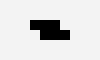
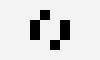
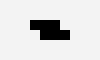
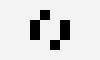
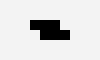
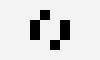
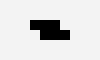
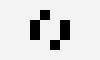
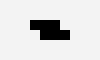

In [6]:
#The Toad
display_link_audio('Club Dance Beat 218.wav')
life_animation(X, dpi=5, frames=9, mode="Loop") 

In [7]:
blinker = [1, 1, 1]

X = np.zeros((5, 5))
X[2, 1:4] = blinker


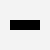
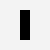
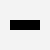
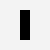
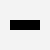
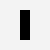

In [8]:
#The Blinker
display_link_audio('Car Start Loop 01.wav')
life_animation(X, dpi=5, frames=6)

## More complex oscillators

In [9]:
Pulser = np.zeros((17, 17))
Pulser[2, 4:7] = 1
Pulser[4:7, 7] = 1
Pulser += Pulser.T
Pulser += Pulser[:, ::-1]
Pulser += Pulser[::-1, :]


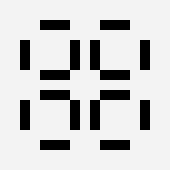
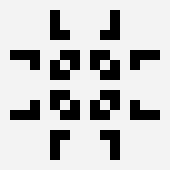
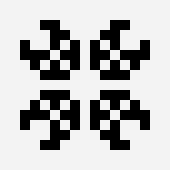
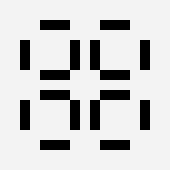
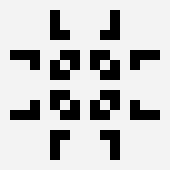
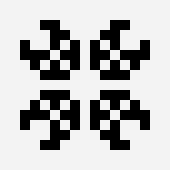
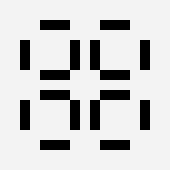
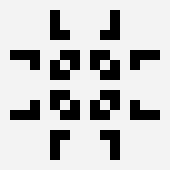
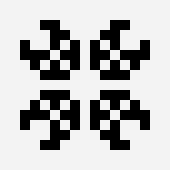
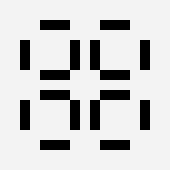
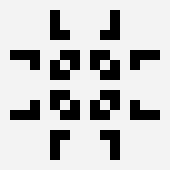
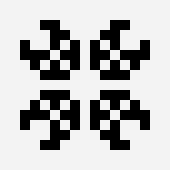

In [10]:
#The Pulser
display_link_audio('Upbeat Funk Drums 06.wav')
life_animation(Pulser, frames=12, mode="Reflect")

# Objects which oscillate, but also move while oscillating

In [11]:
glider = [[1, 0, 0],
          [0, 1, 1],
          [1, 1, 0]]
X = np.zeros((15, 15))
X[:3, :3] = glider


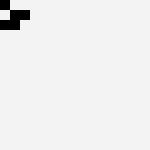
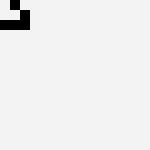
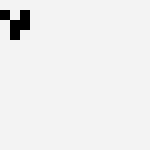
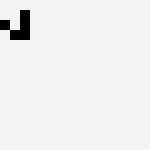
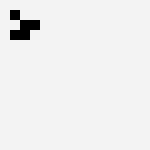
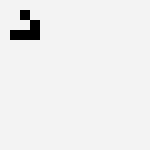
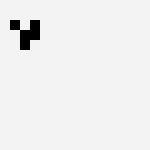
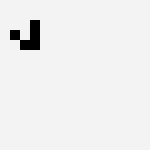
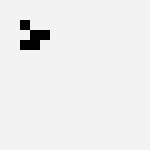
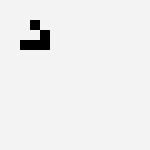
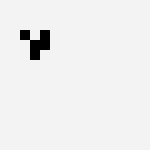
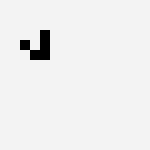
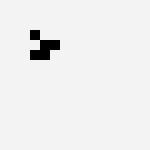
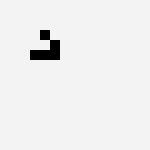
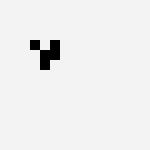
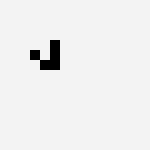
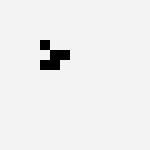
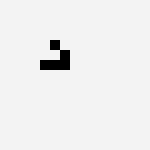
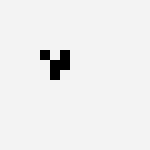
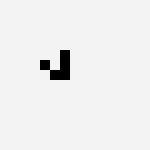
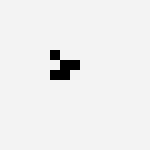
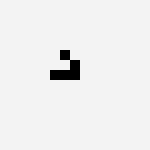
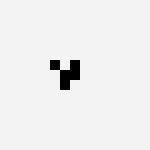
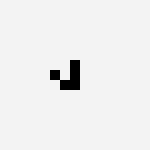
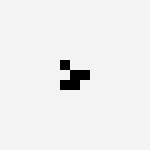
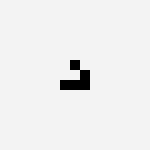
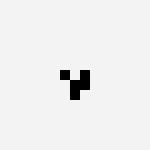
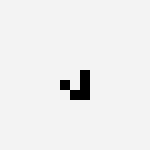
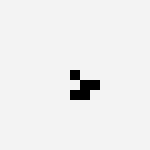
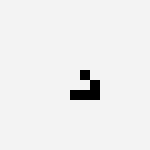
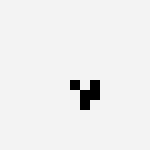
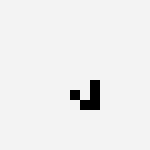
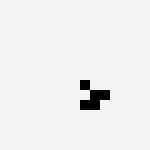
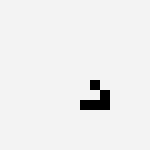
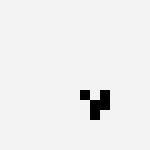
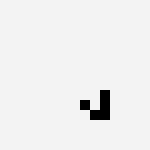
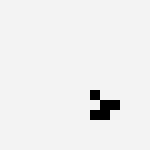
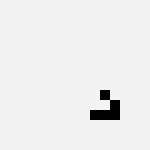
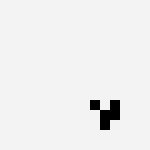
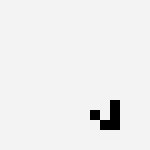
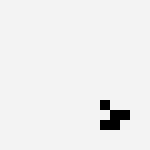
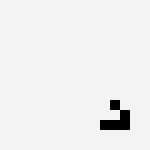
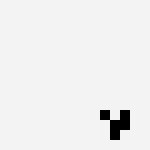
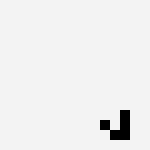
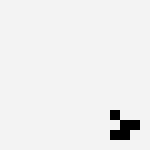
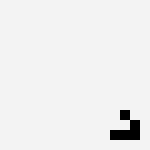
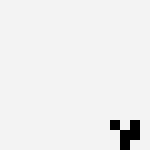
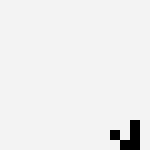
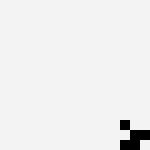
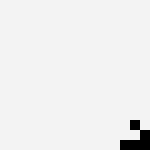

In [12]:
#The Glider
display_link_audio('Funky Pop Drums 05.wav')
life_animation(X, dpi=5, frames=50, interval=100)

In [13]:
Megan_Firecracker = [[1, 0, 0, 1],
          [1, 0, 1, 0],
          [1, 1, 0, 1], 
          [0, 0, 1, 0]]
X = np.zeros((15, 15))
X[:4, :4] = Megan_Firecracker


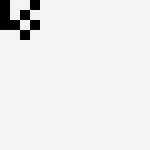
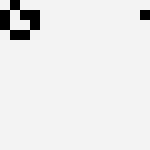
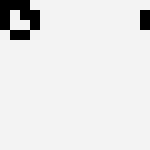
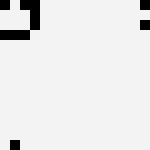
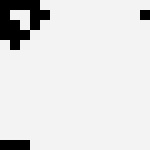
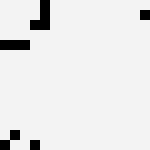
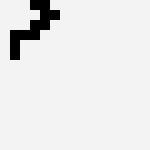
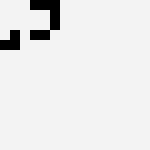
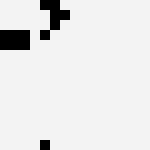
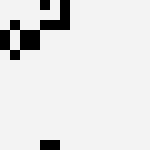
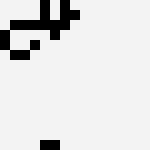
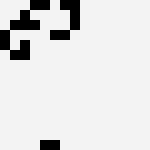
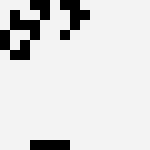
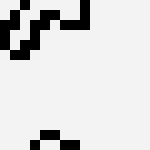
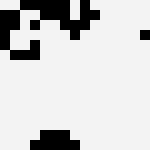
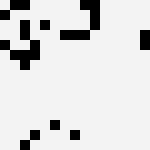
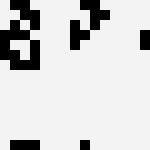
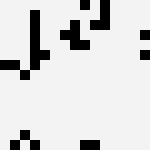
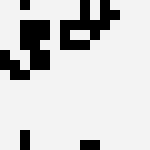
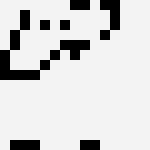
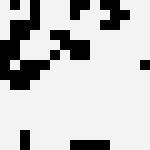
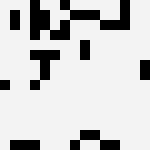
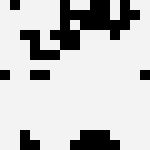
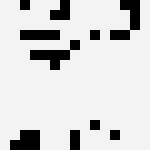
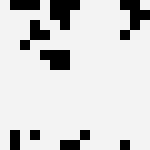
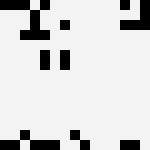
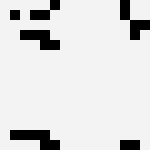
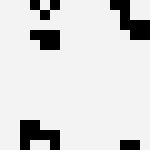
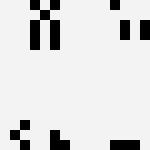
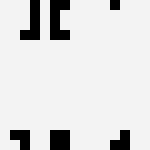
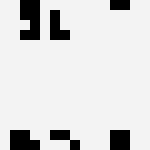
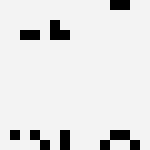

In [14]:
##Megan's FireCracker
display_link_audio('Swirly Filter 06.wav')
life_animation(X, dpi=5, frames=32, interval=100)

# Bill Gosper created one of the first unbounded growth configurations, it is known as the Glider Gun. It is an oscilator that creates a infinite number of gliders. 

In [15]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((50, 70))
X[1:10,1:37] = glider_gun


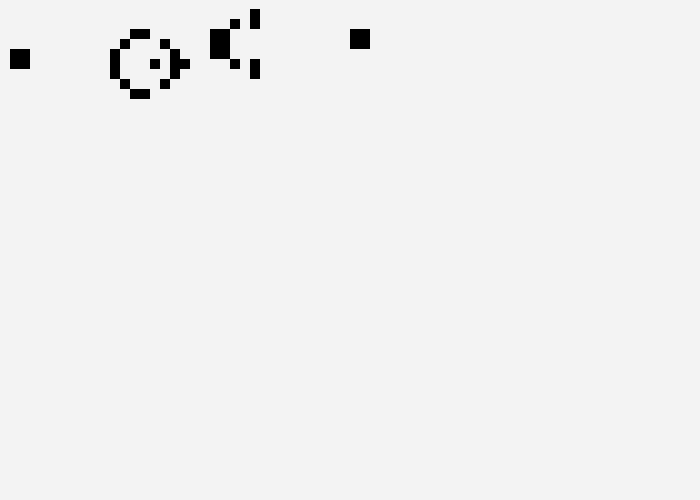
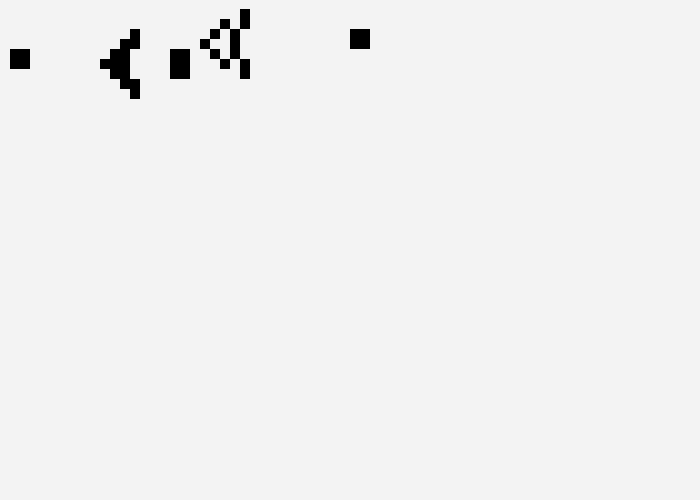
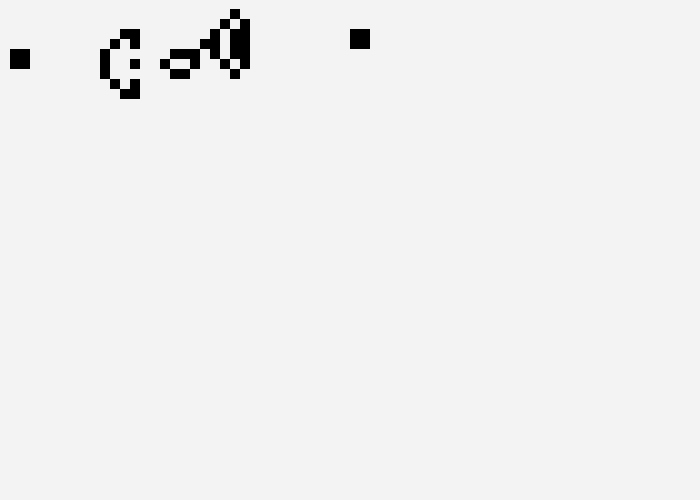
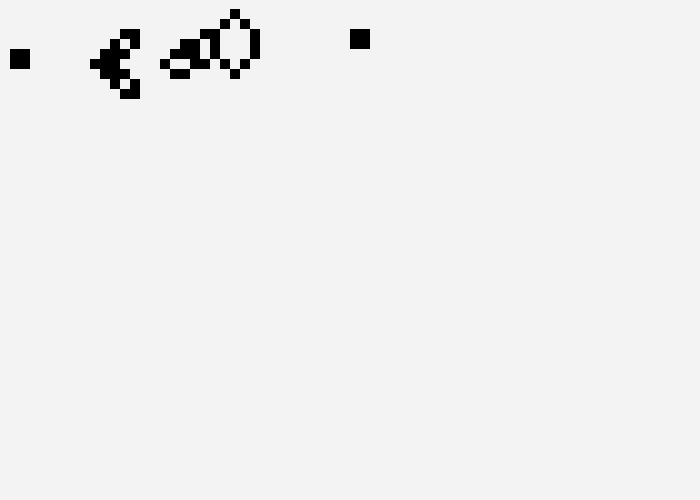
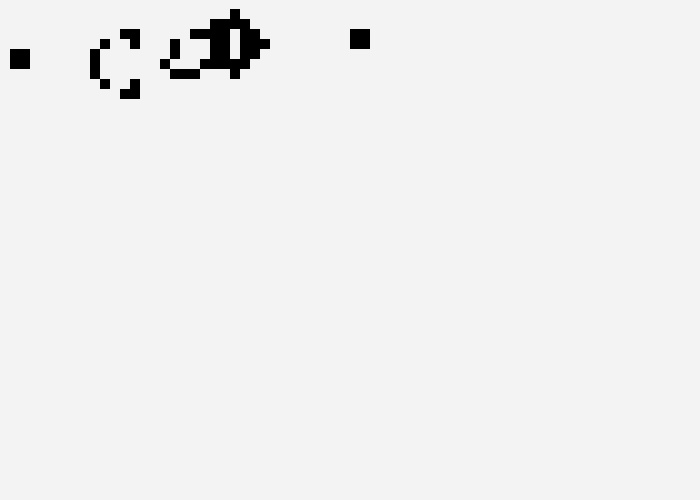
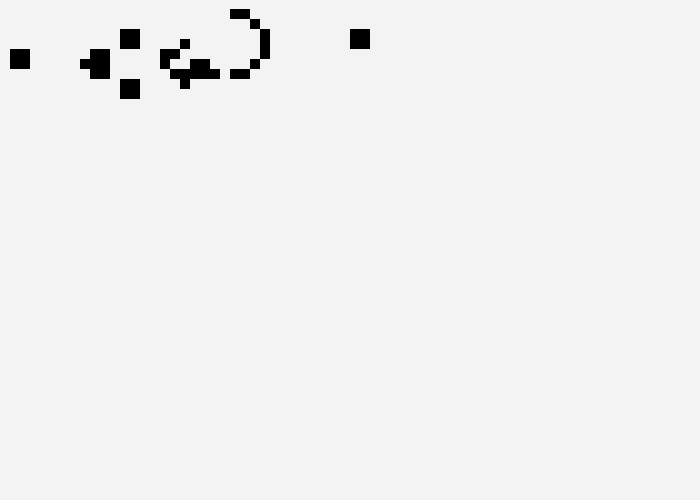
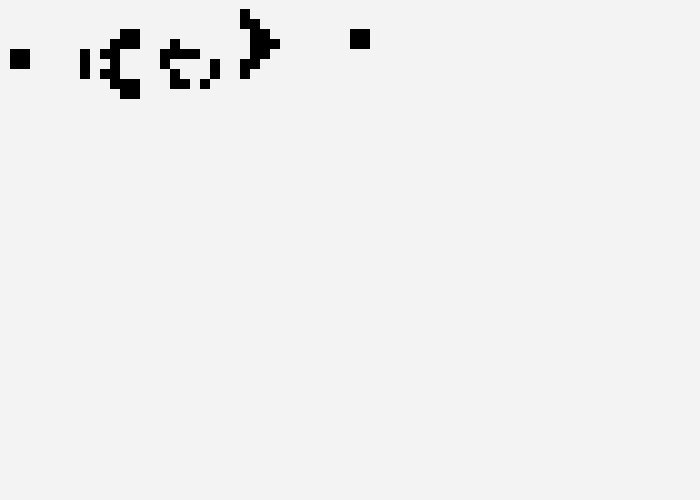
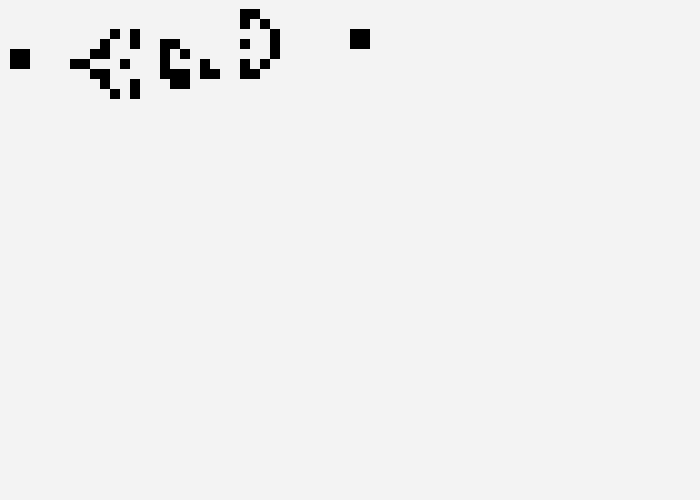
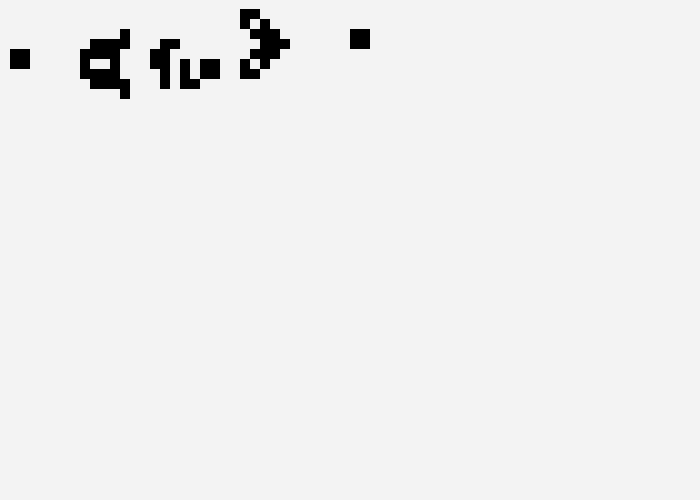
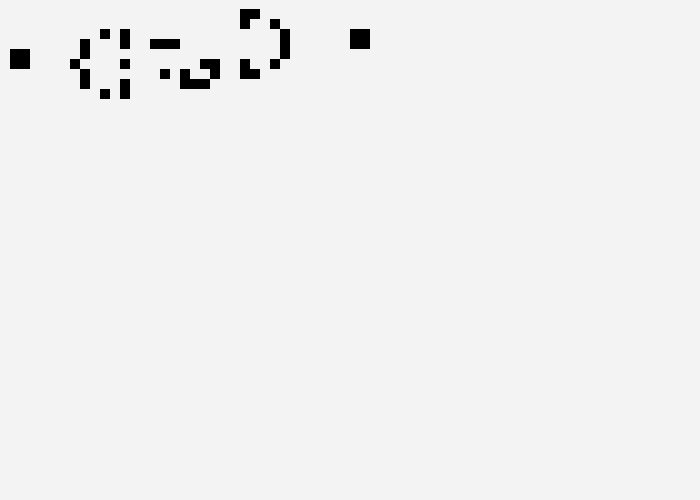
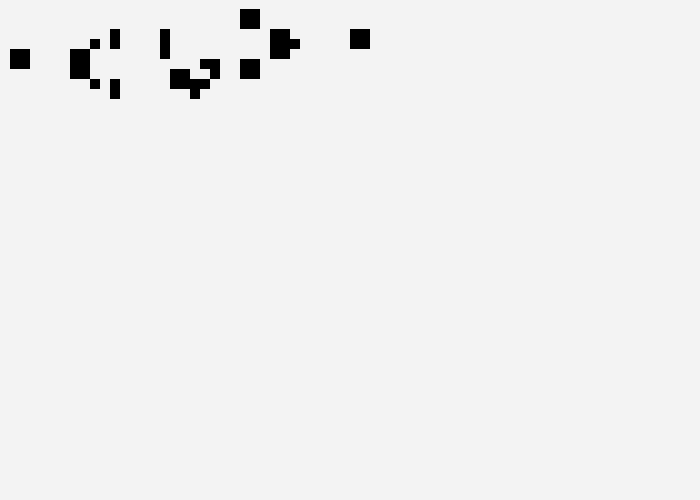
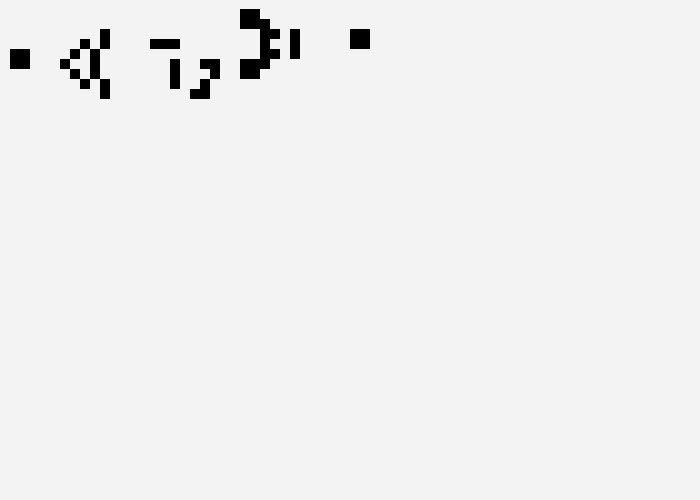
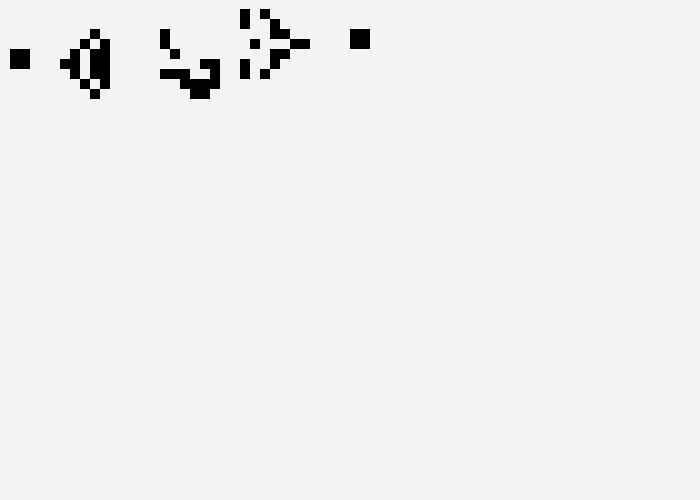
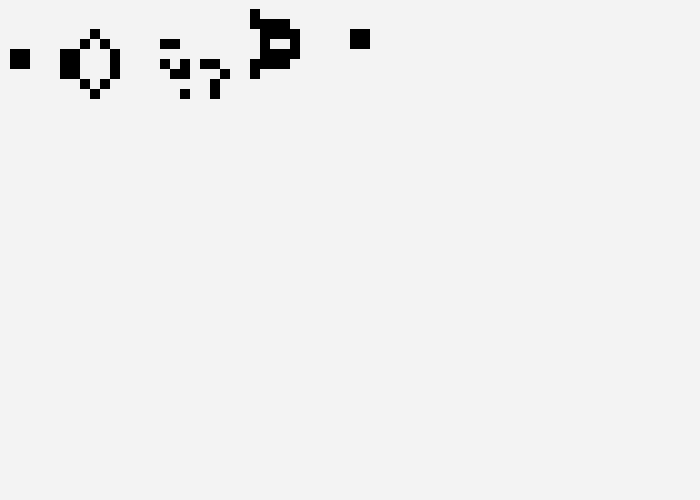
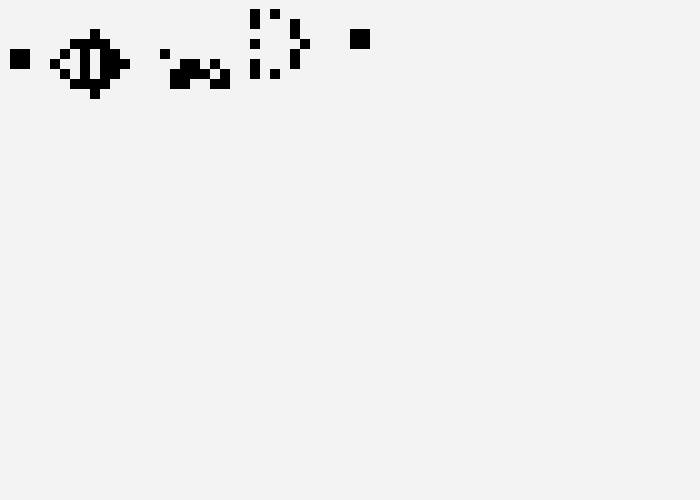
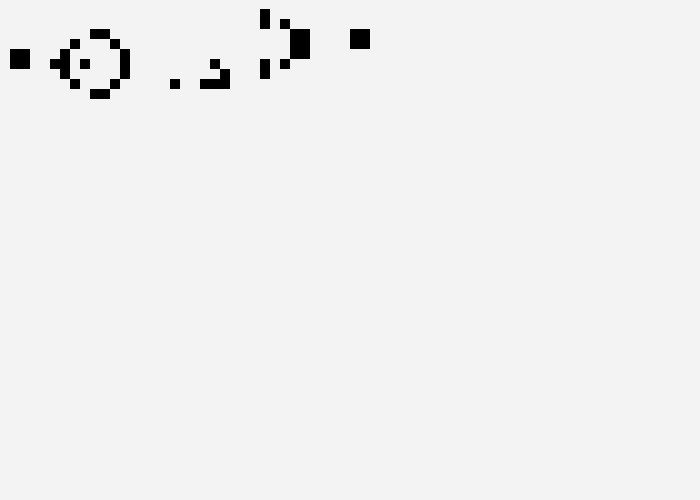
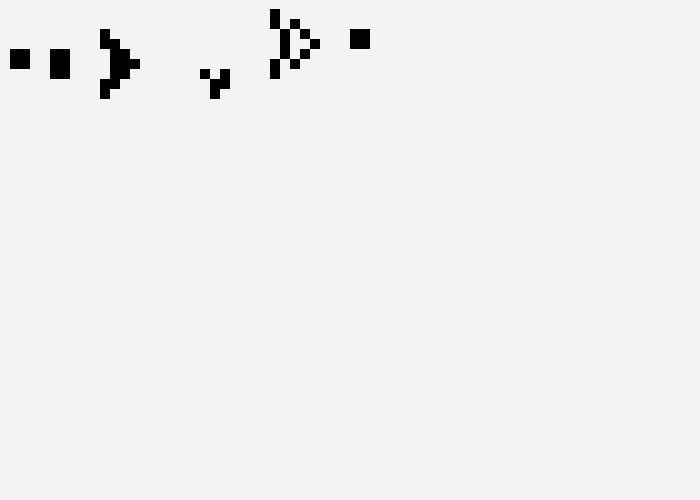
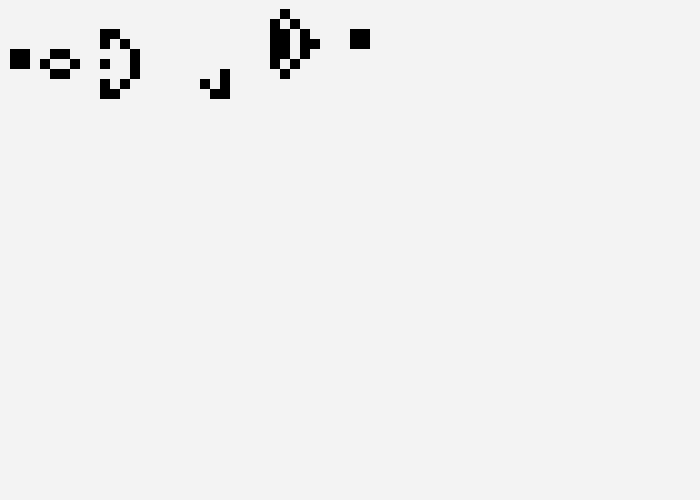
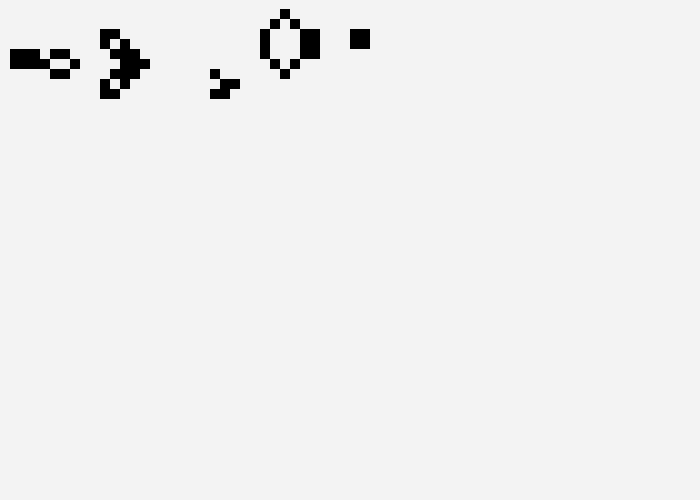
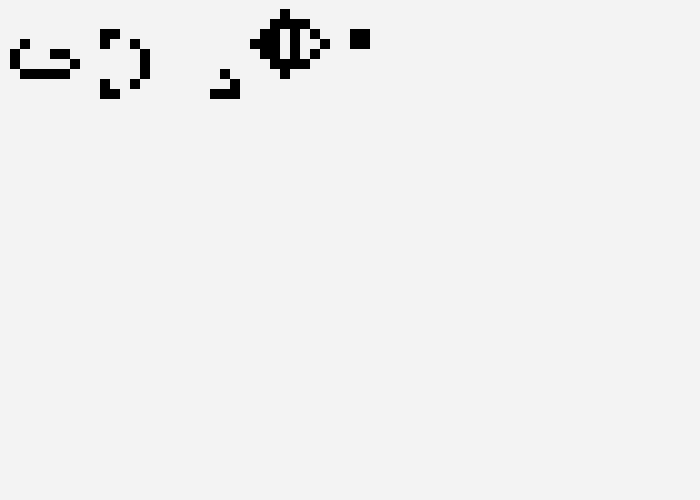
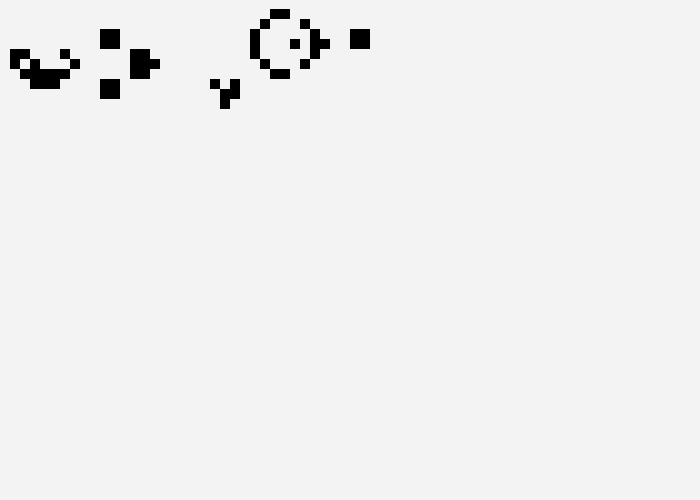
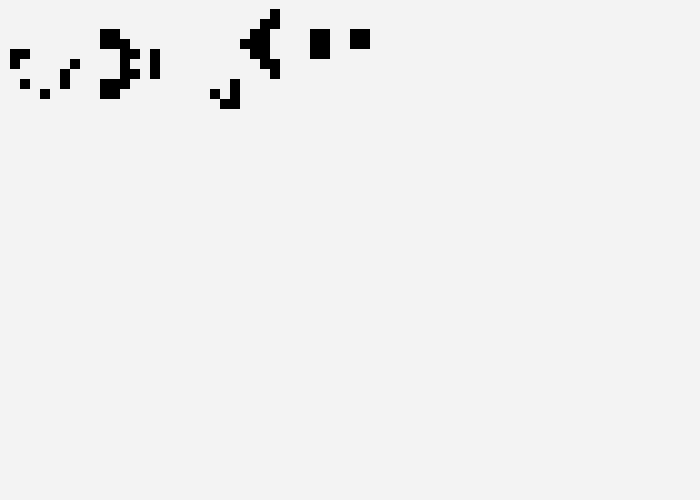
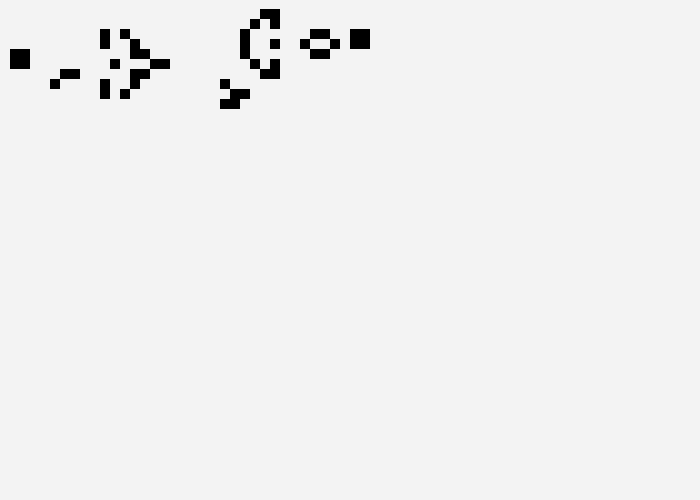
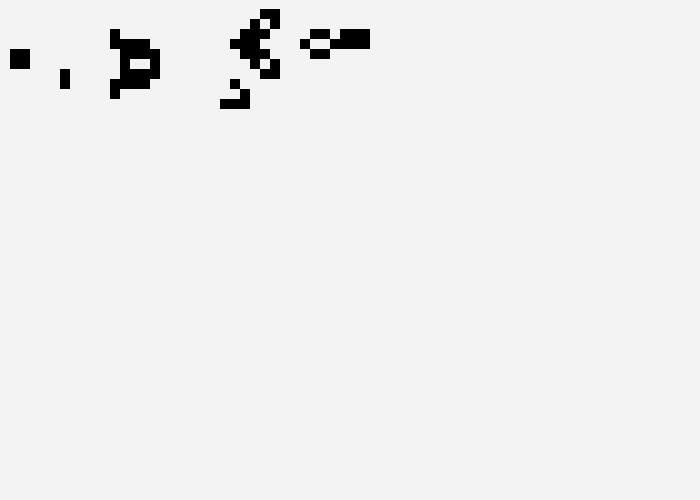
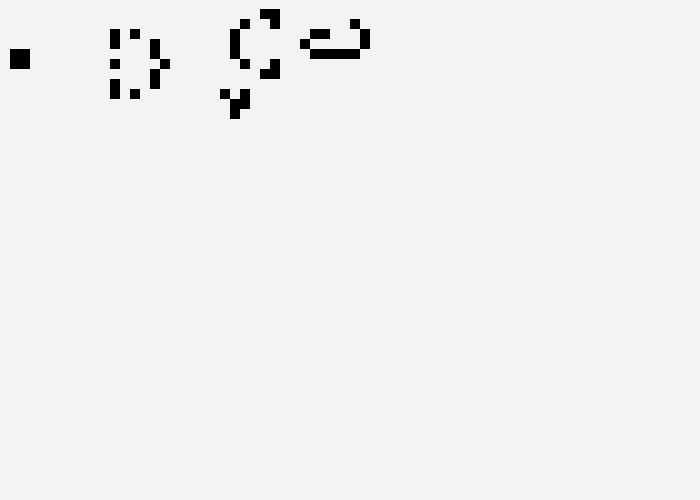
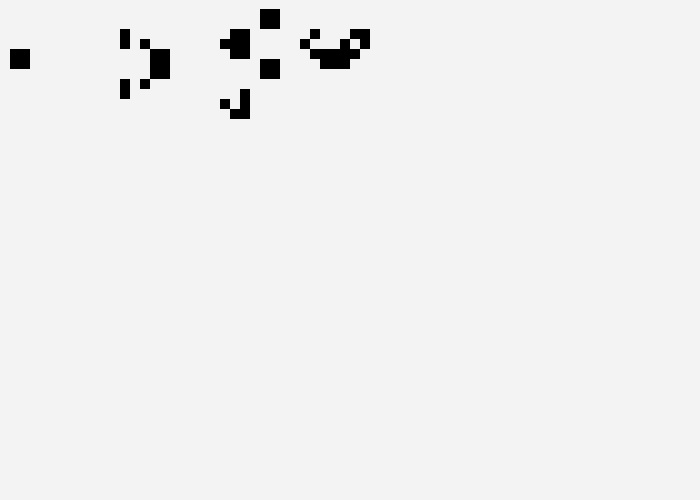
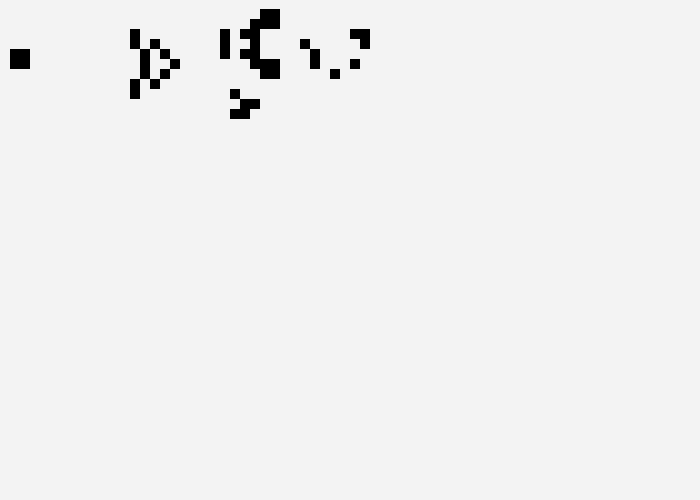
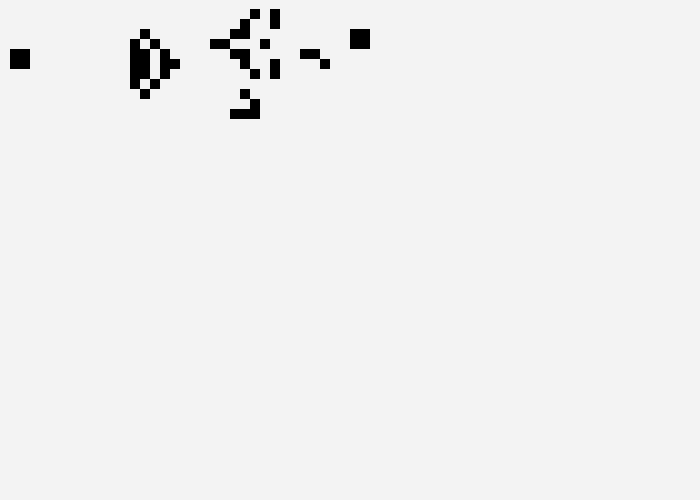
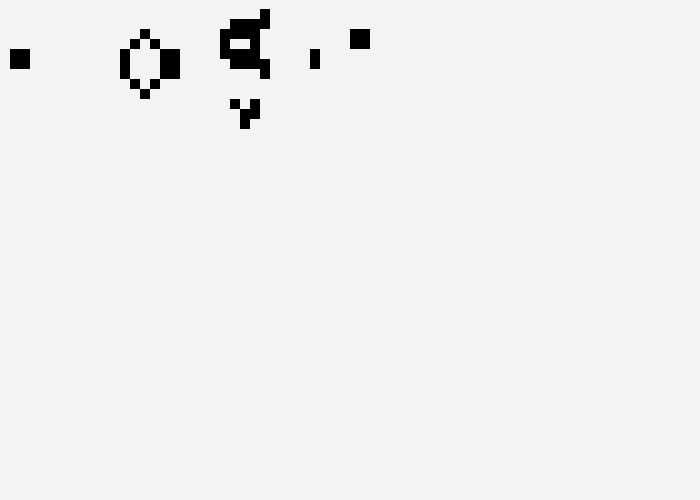
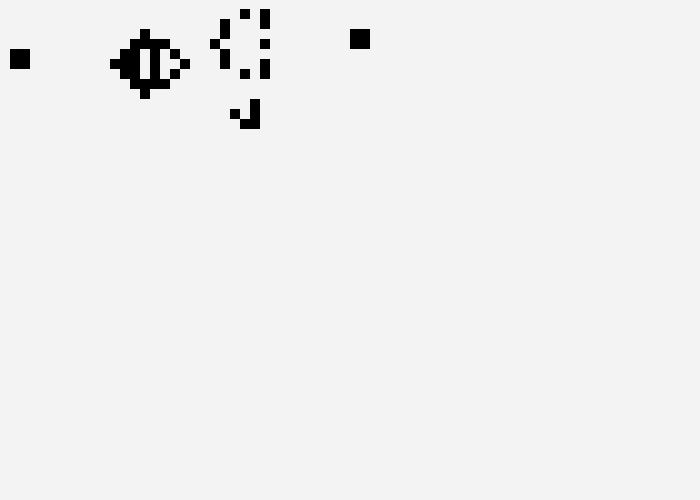
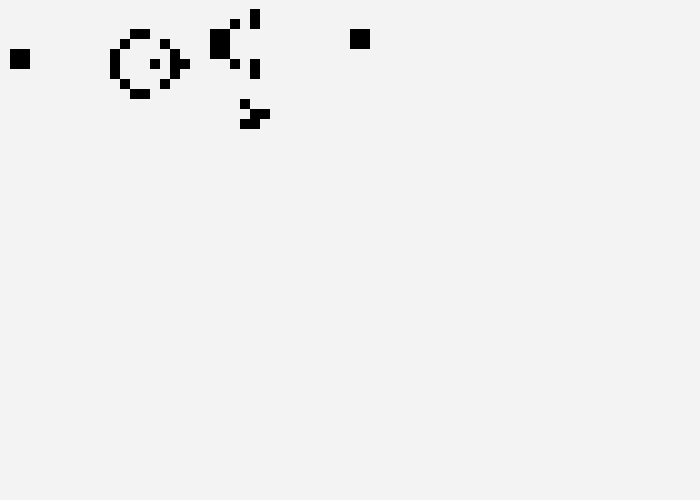
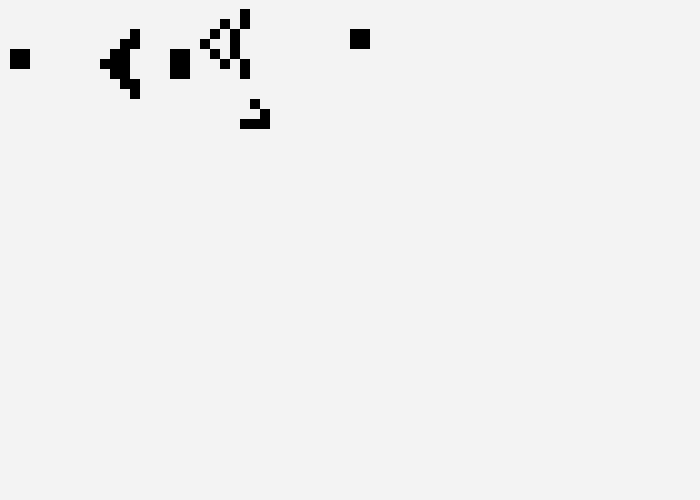
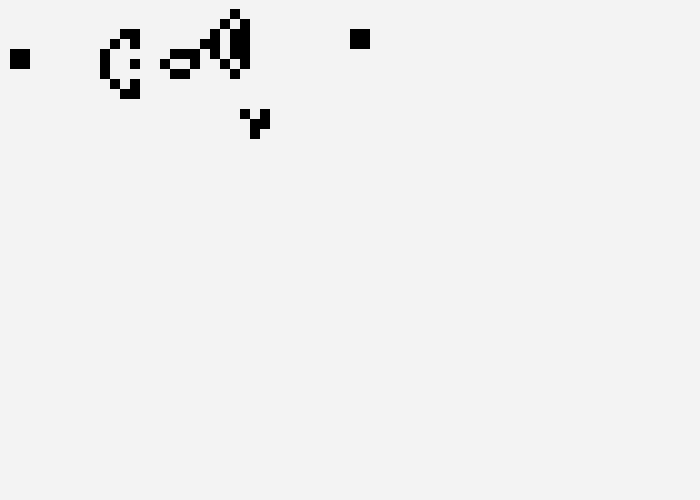
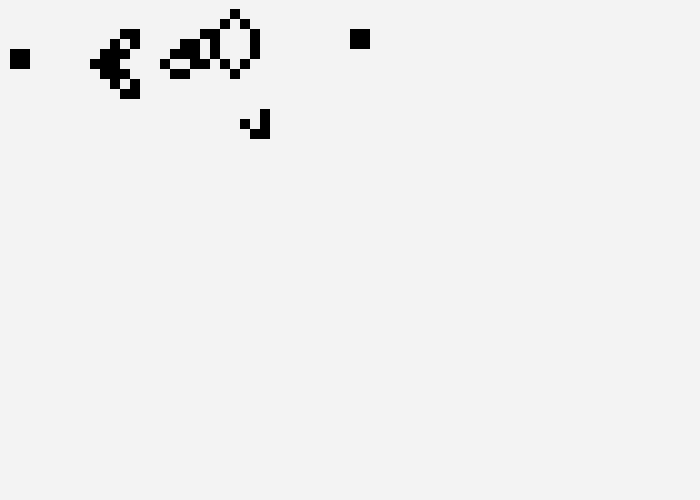
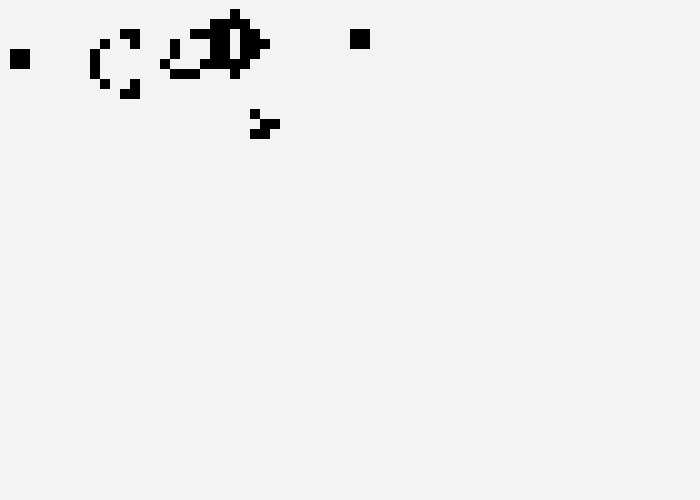
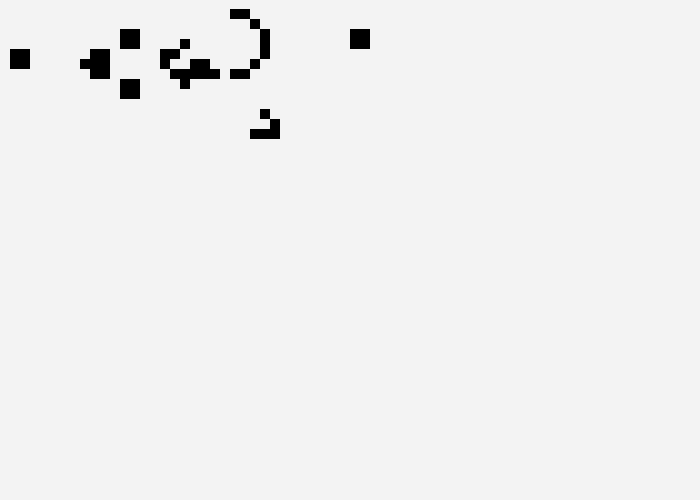
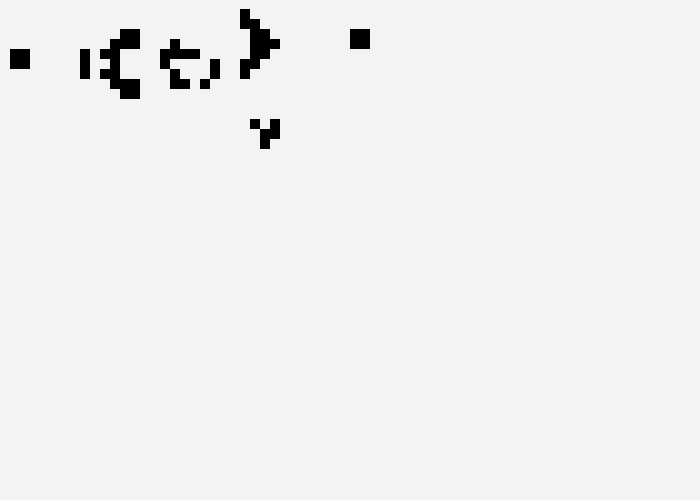
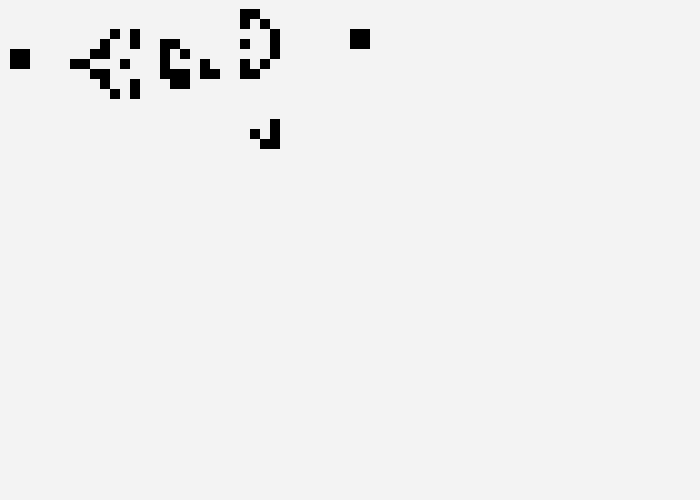
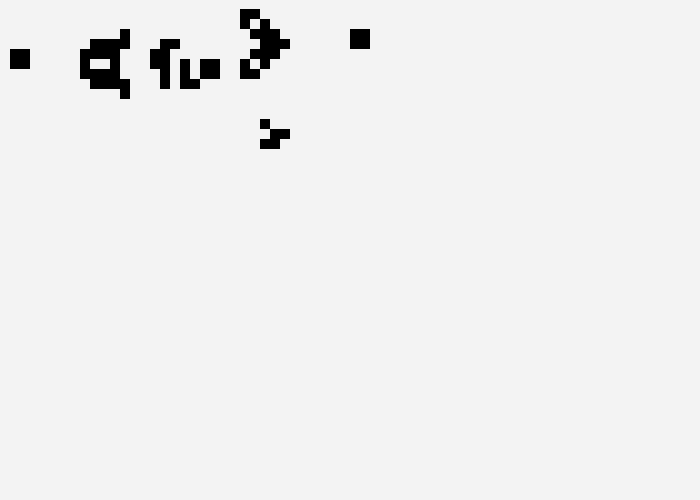
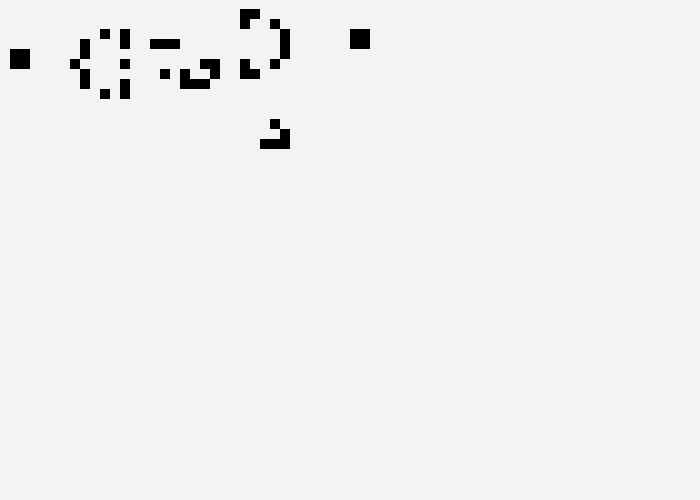
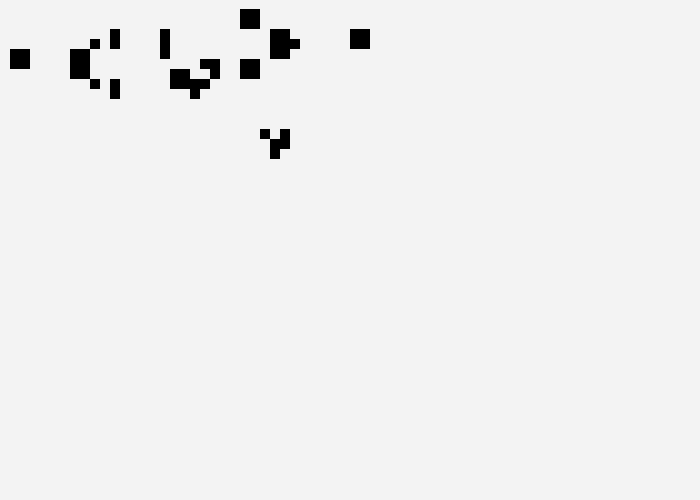
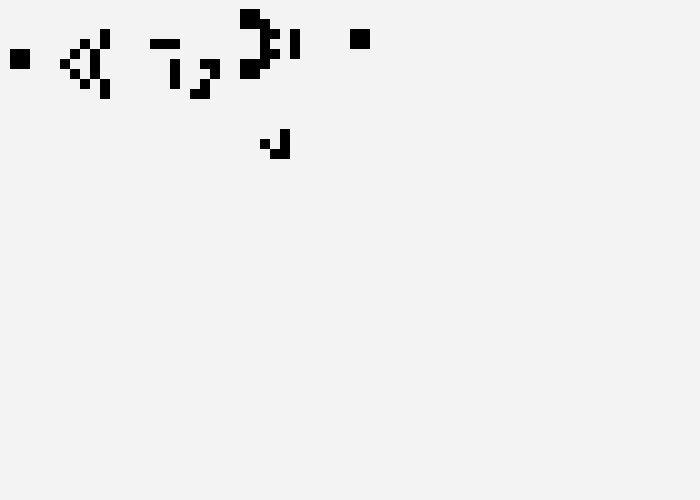
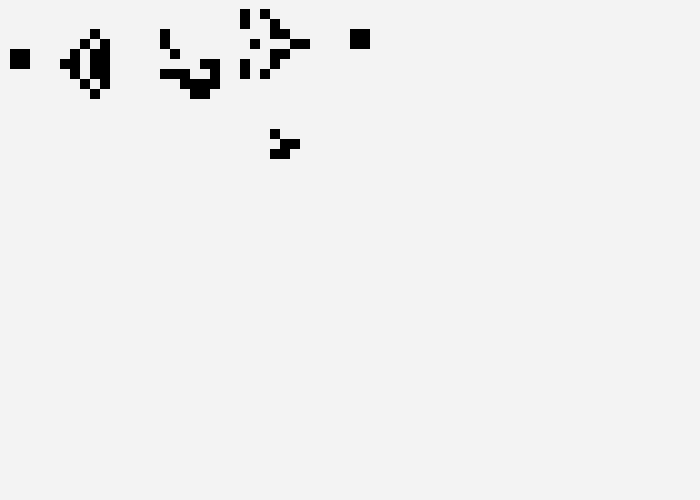
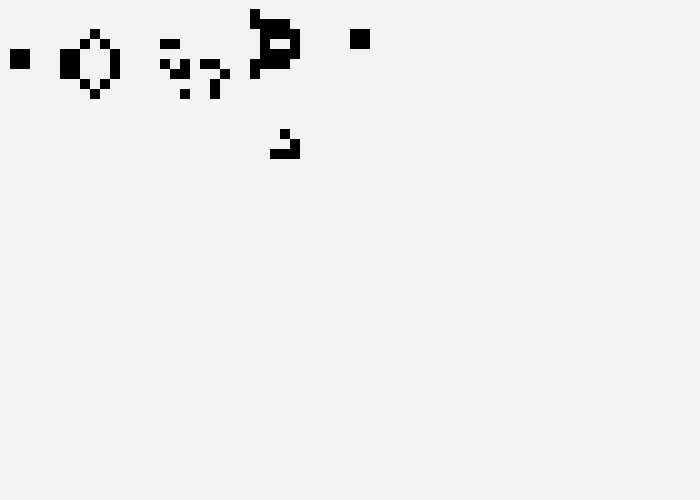
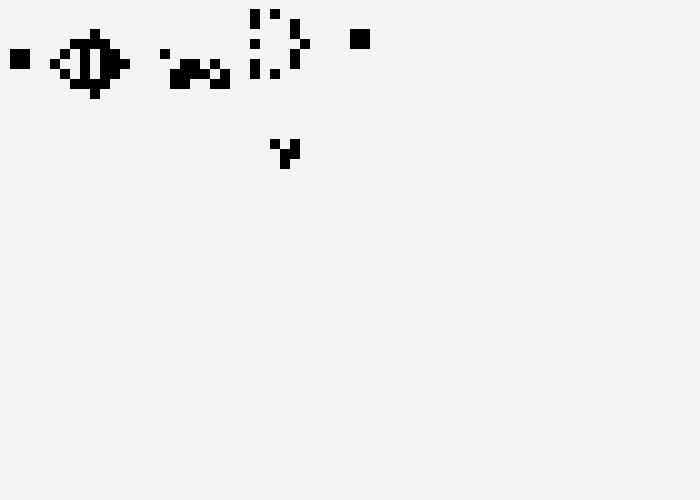
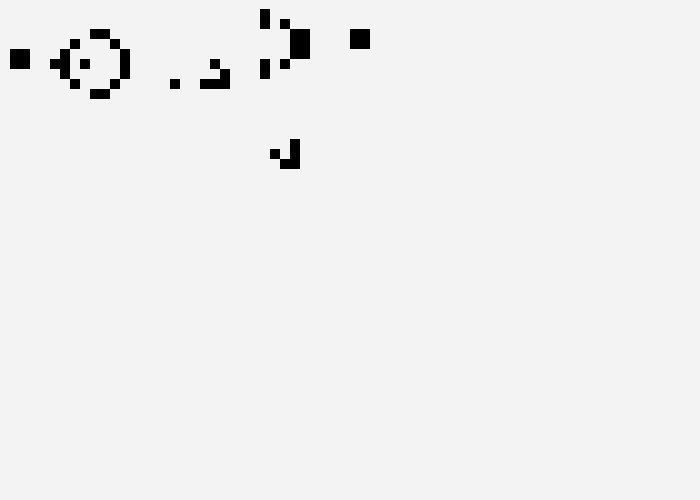
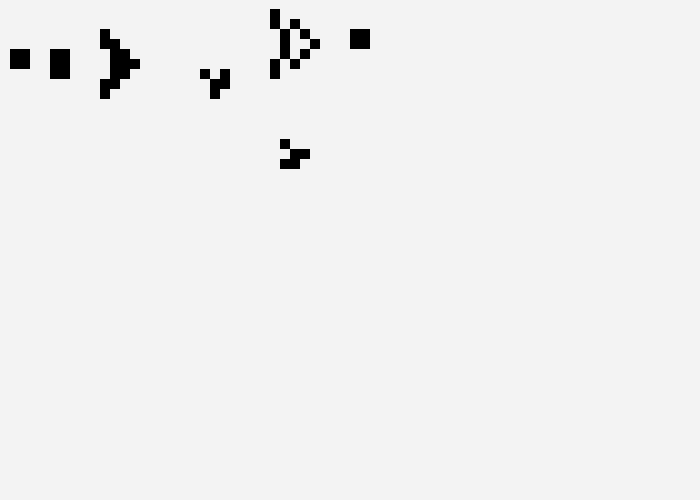
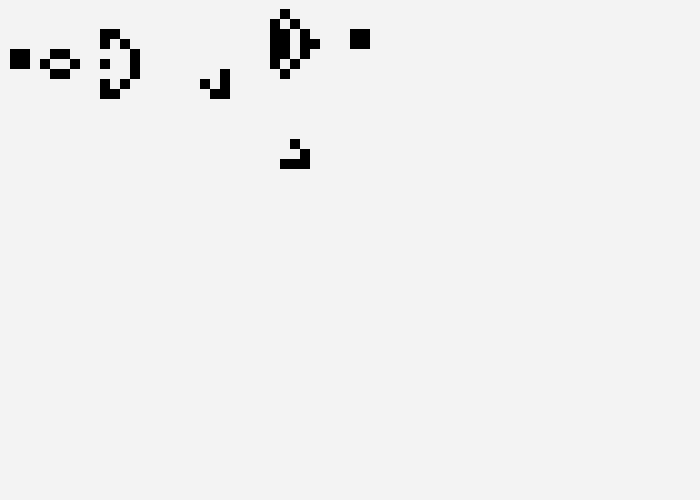
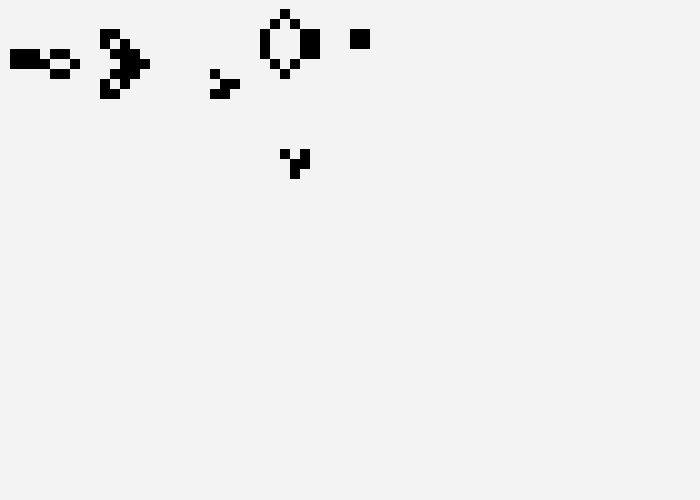
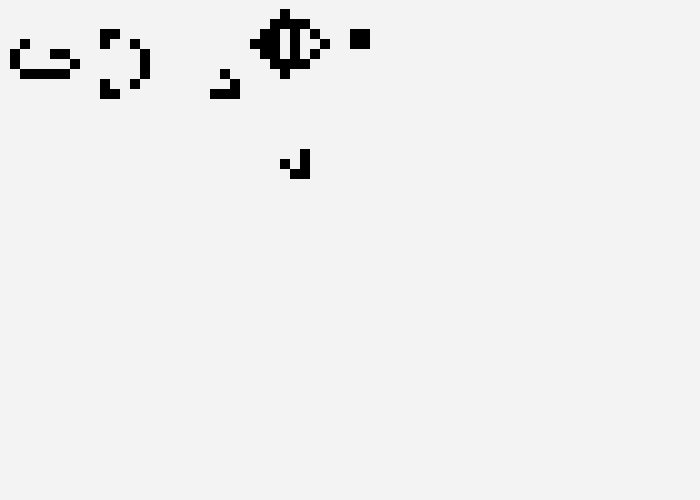
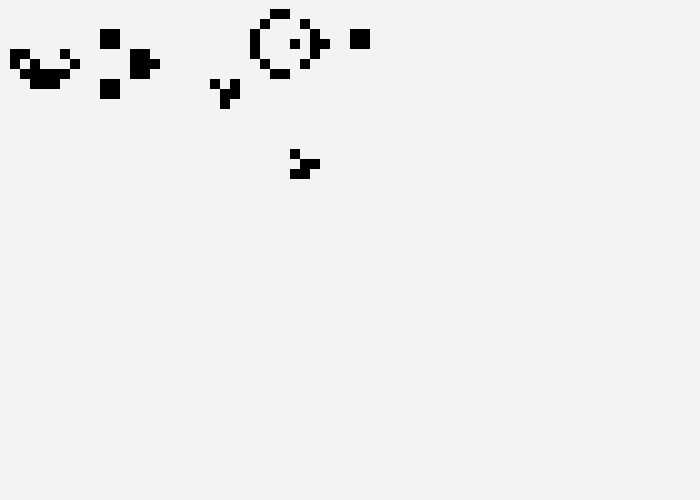
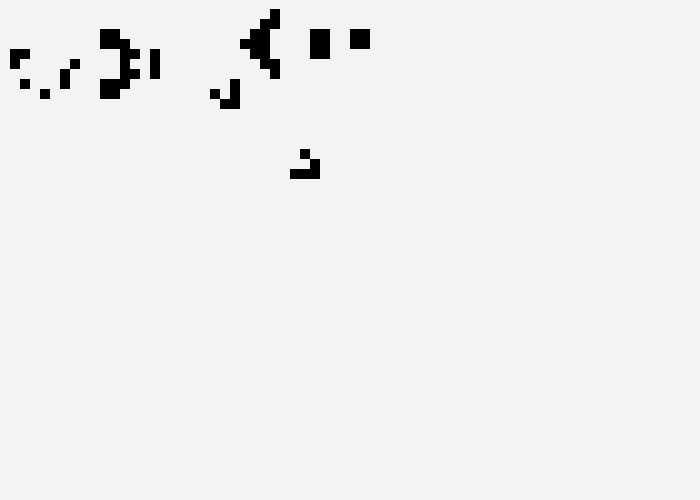
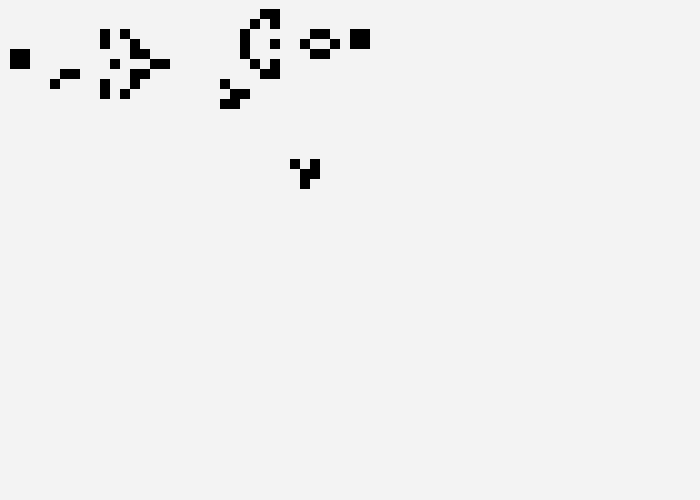
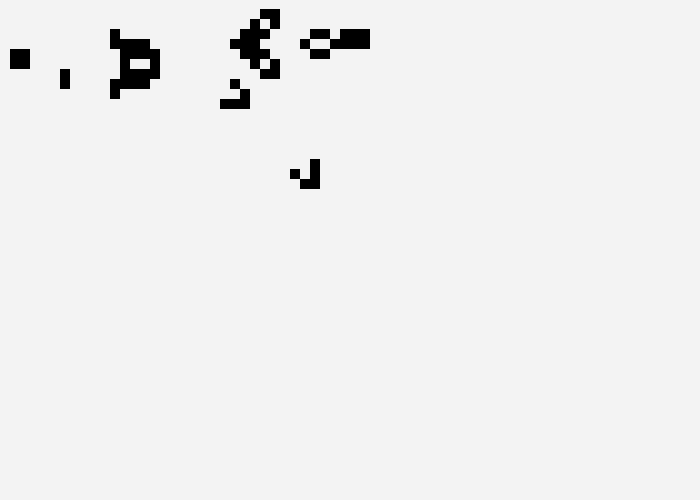
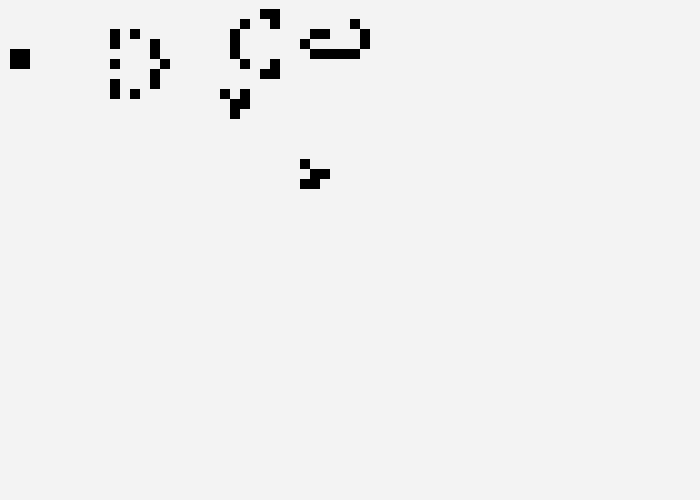
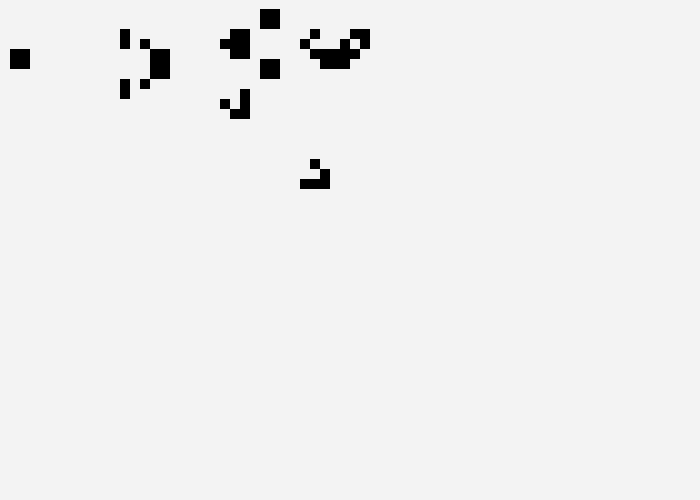
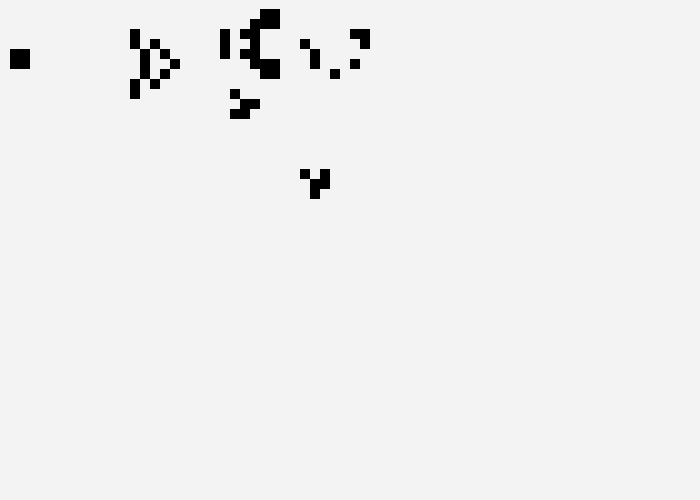
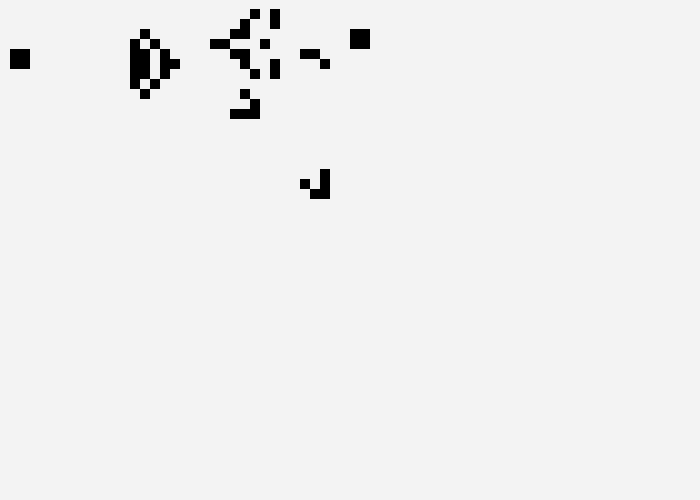
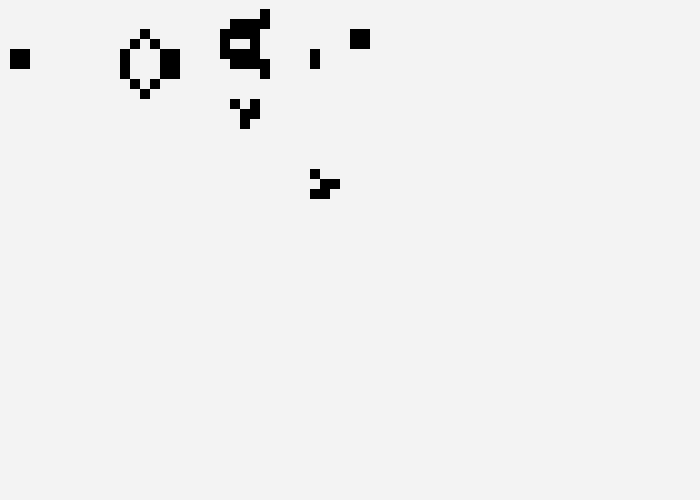
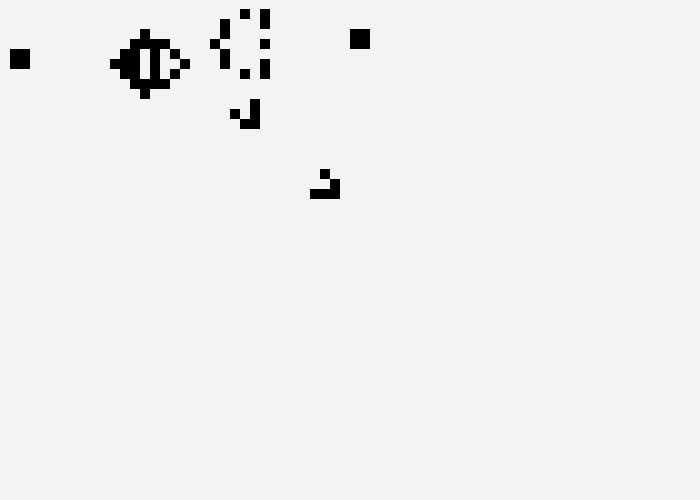
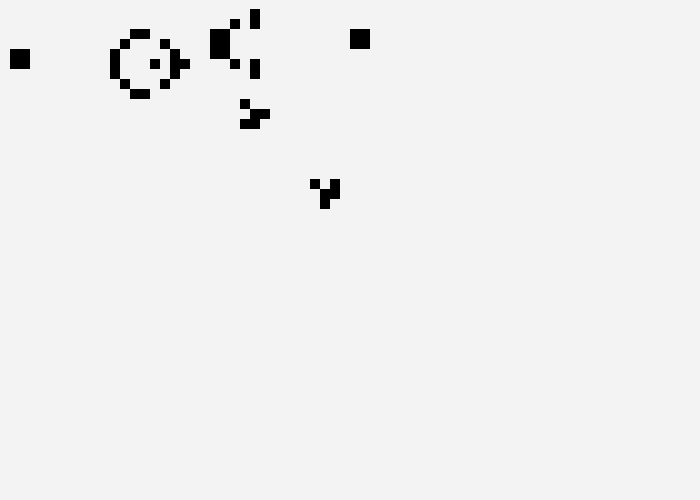
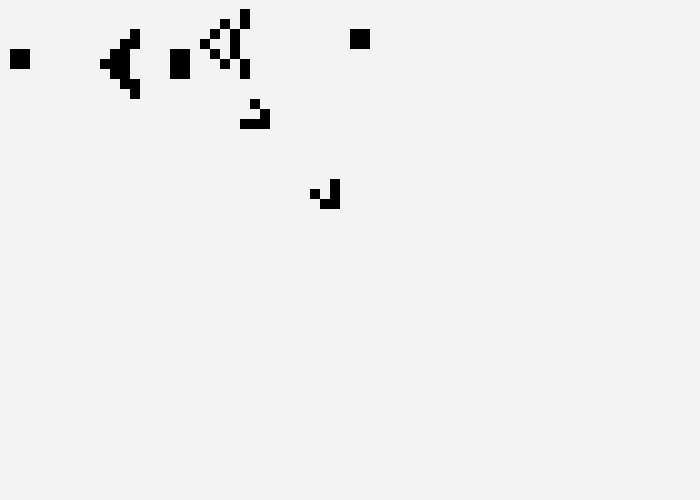
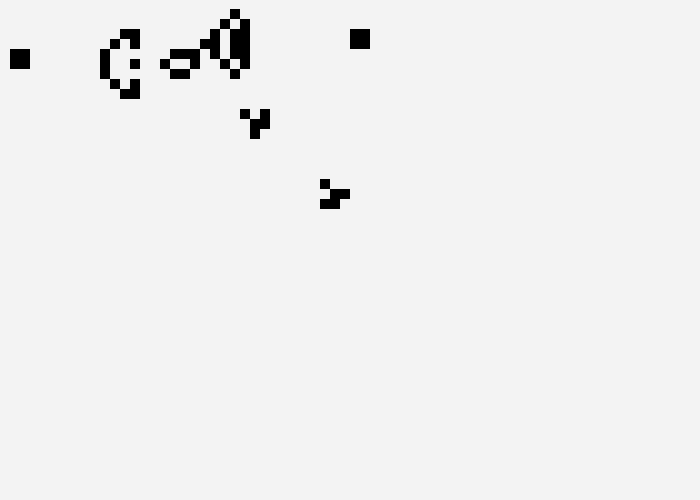
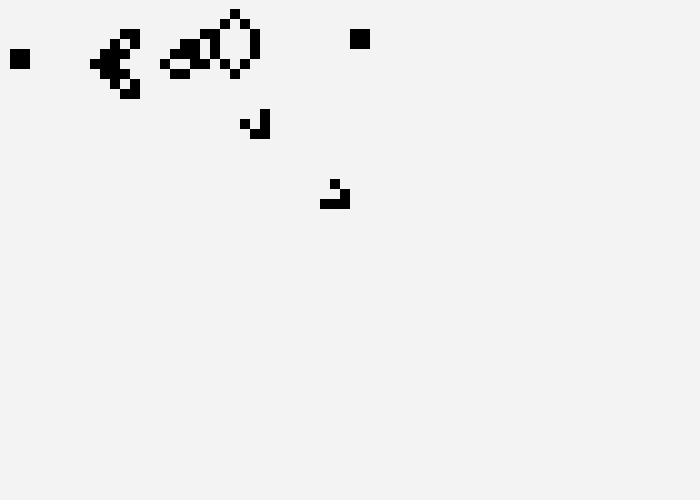
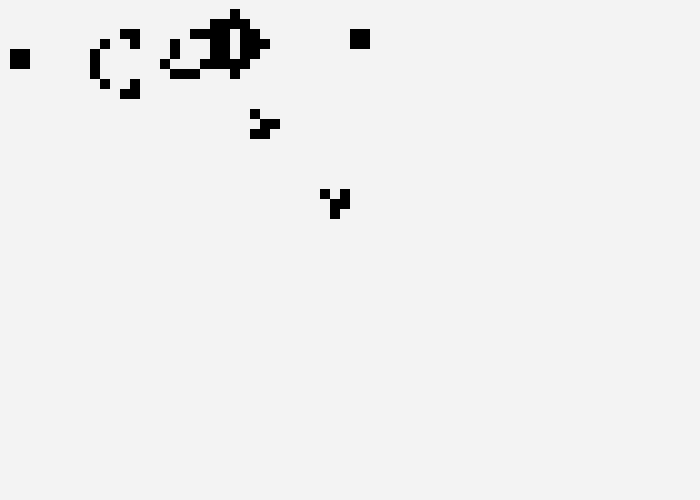
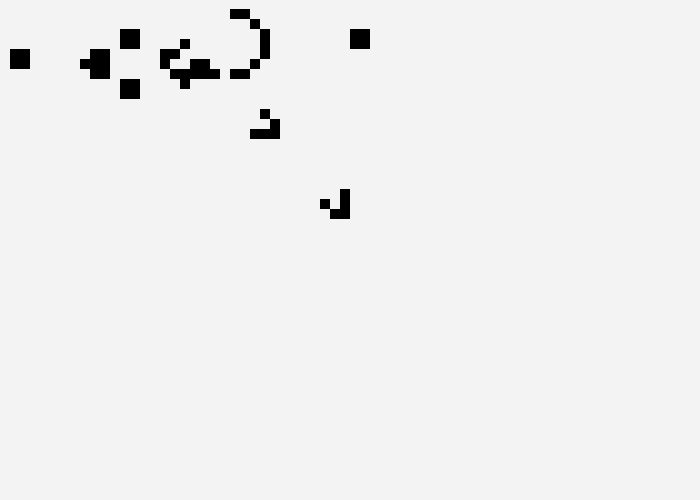
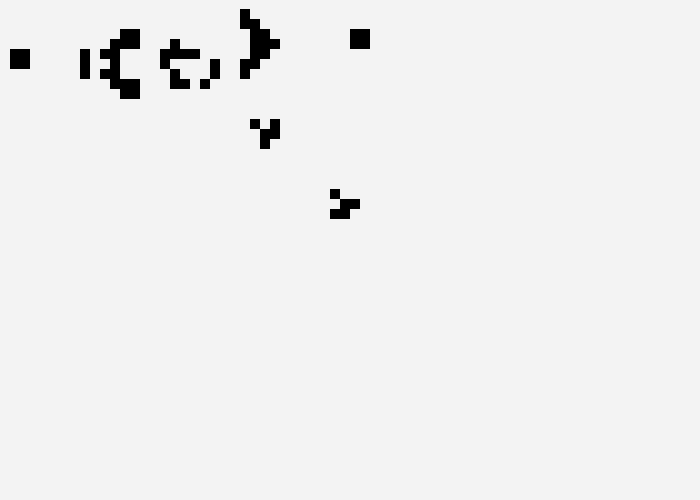
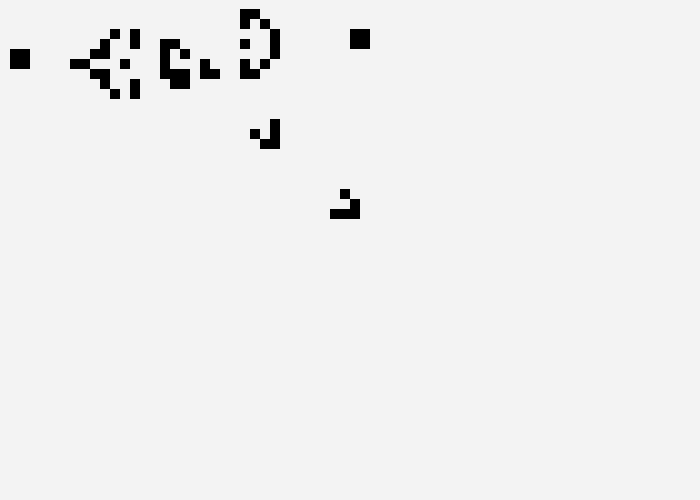
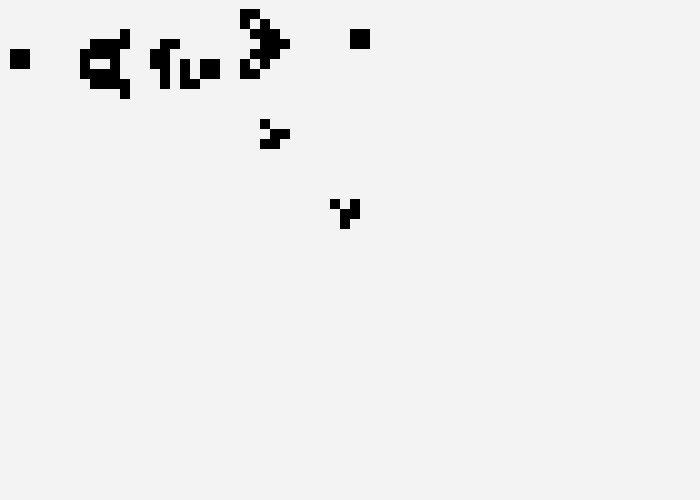
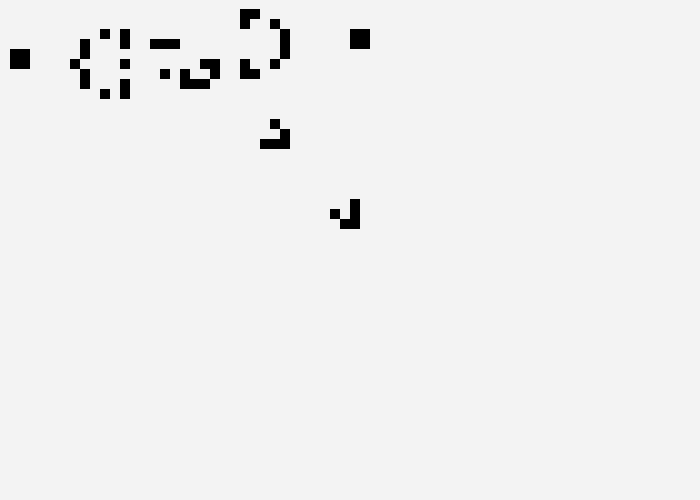
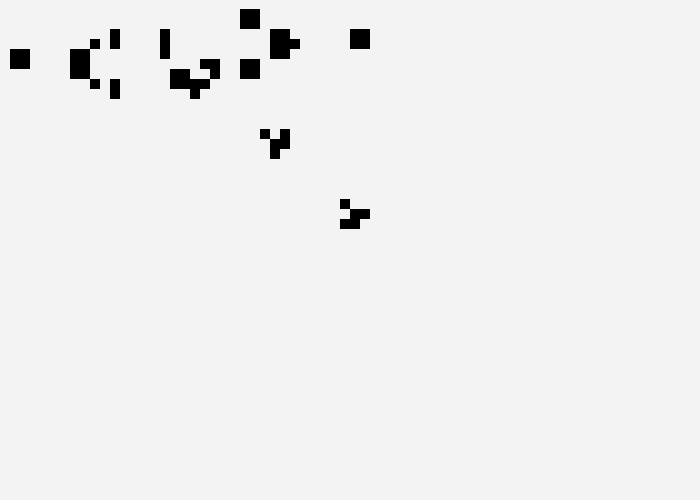
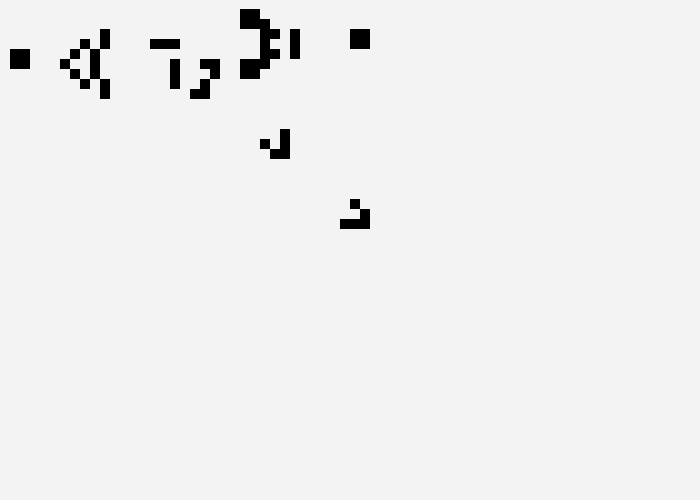
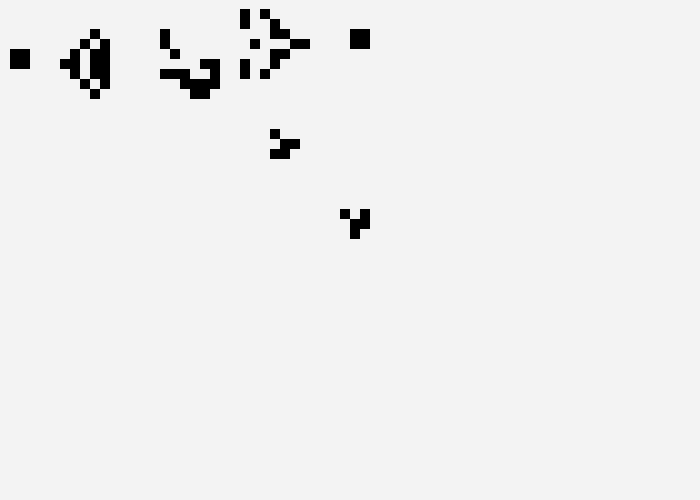
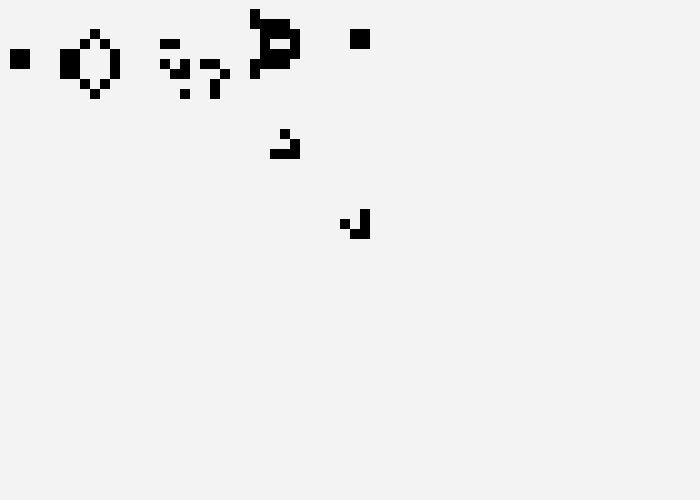
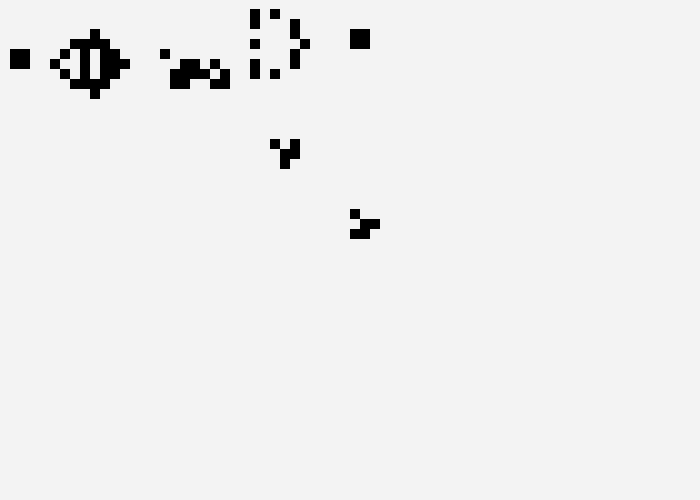
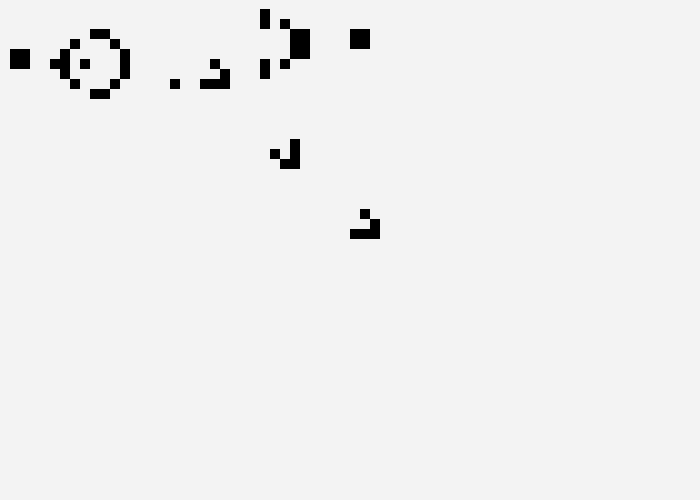
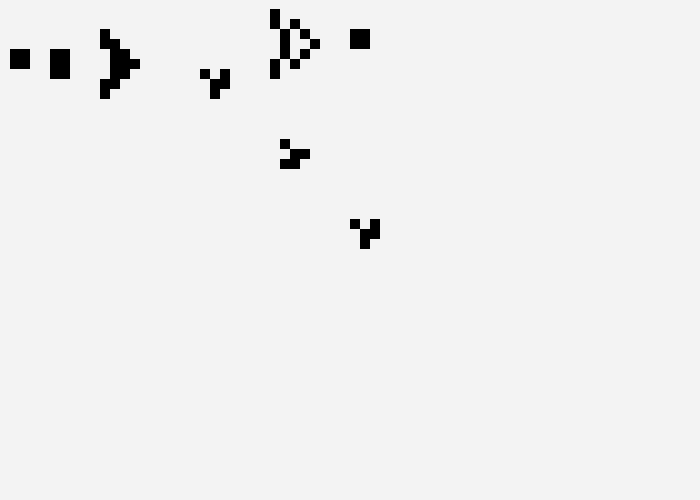
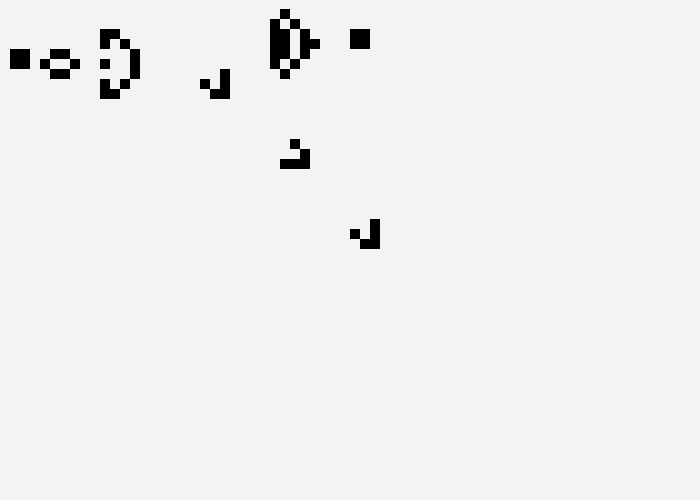
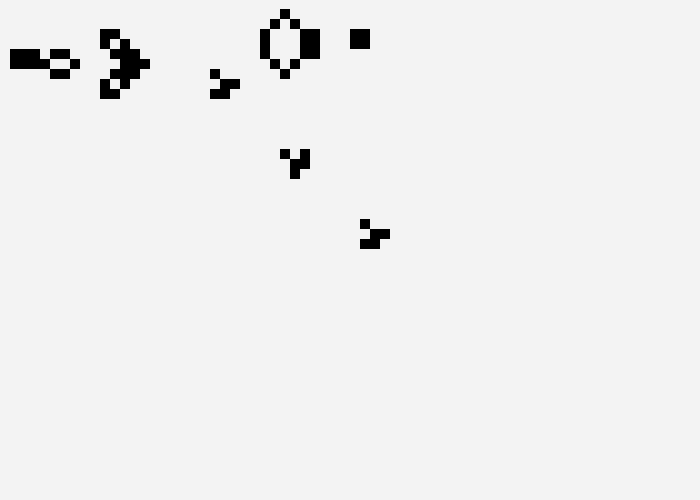
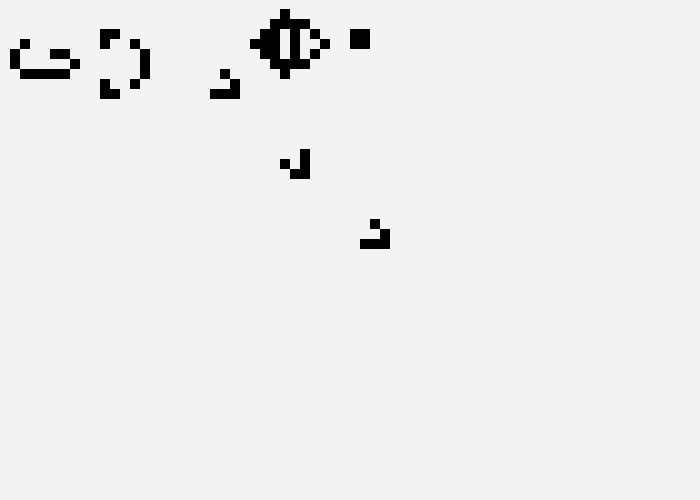
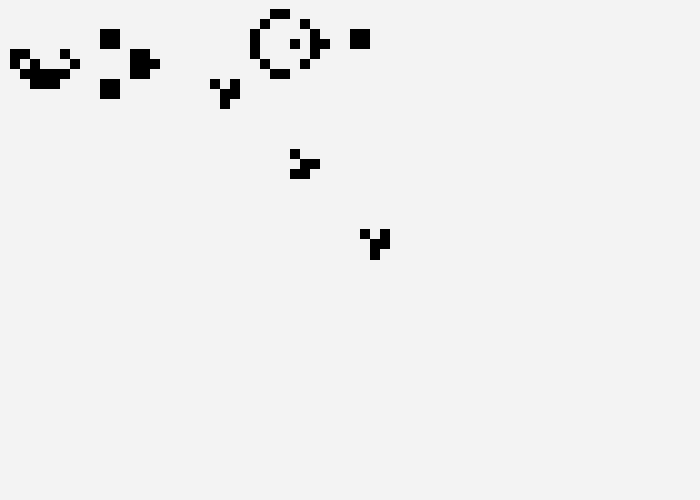
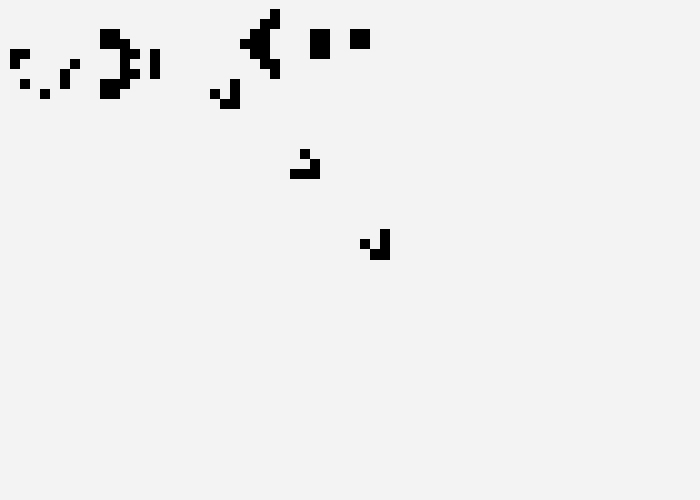
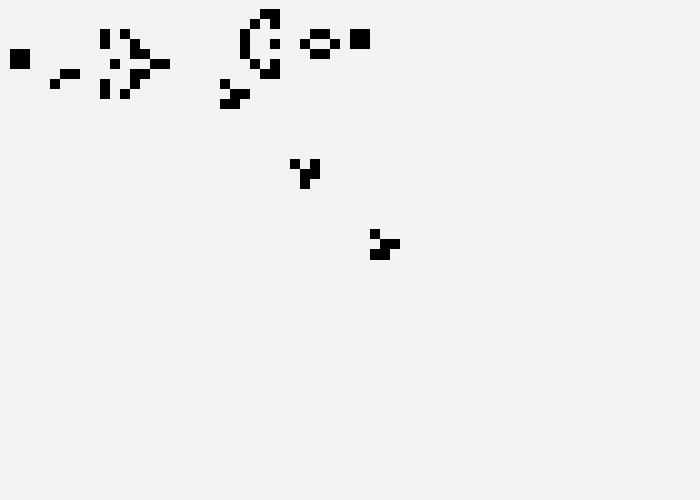
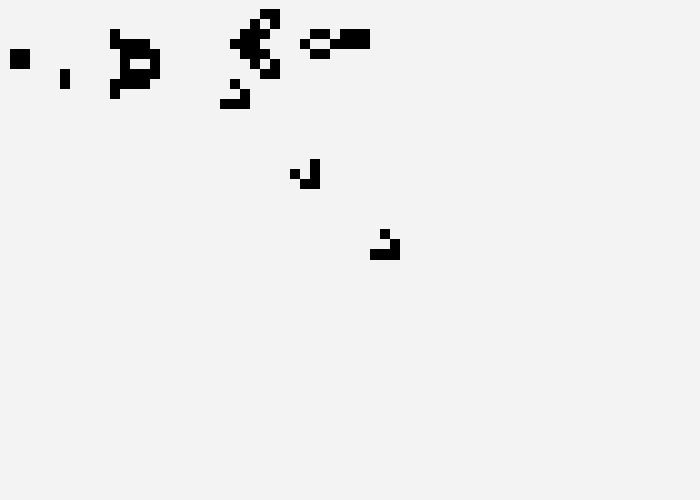
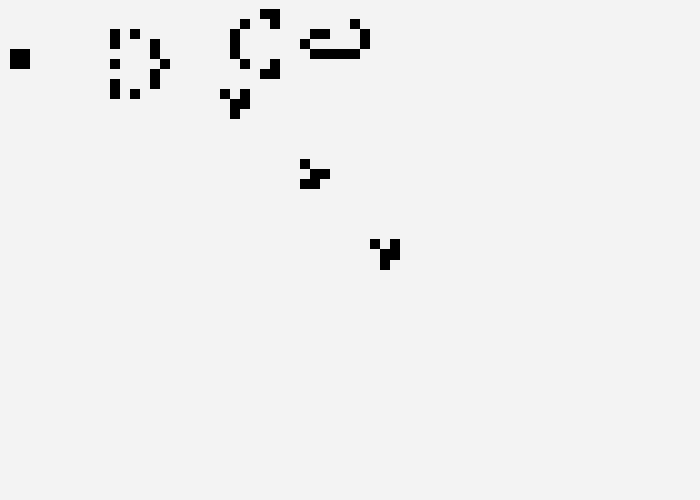
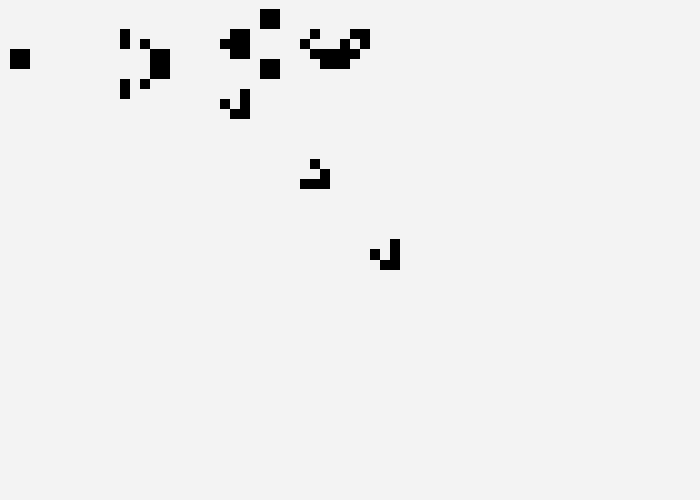
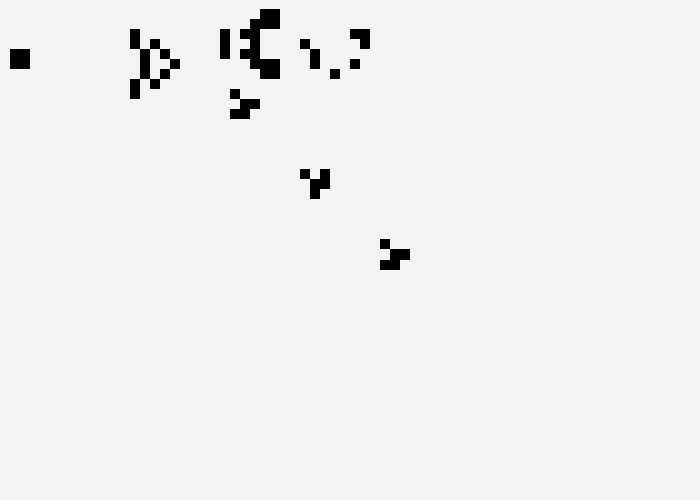
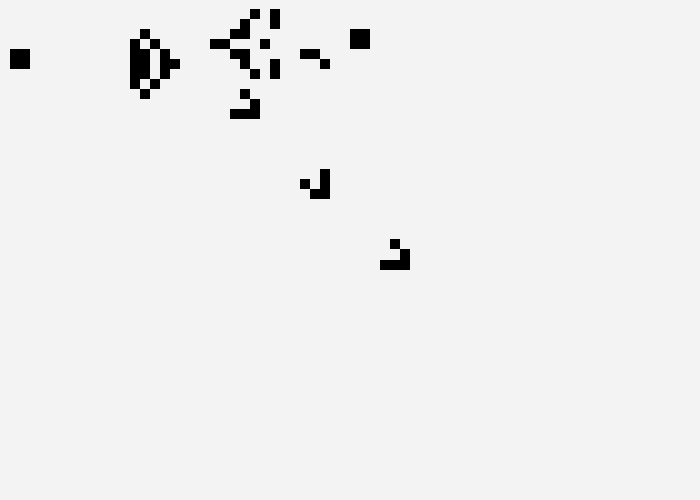
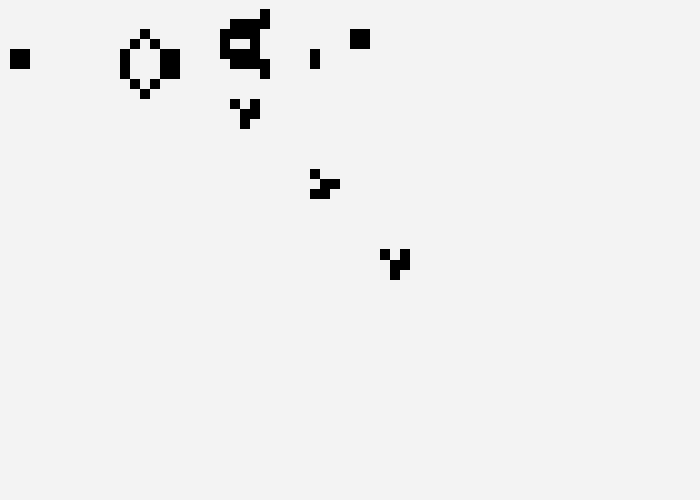
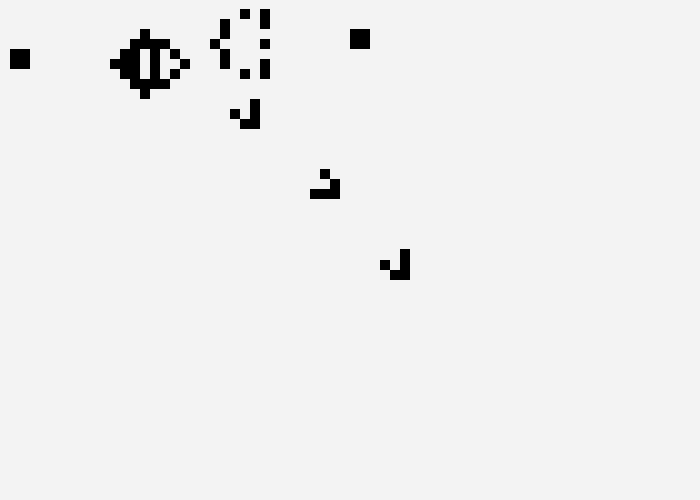
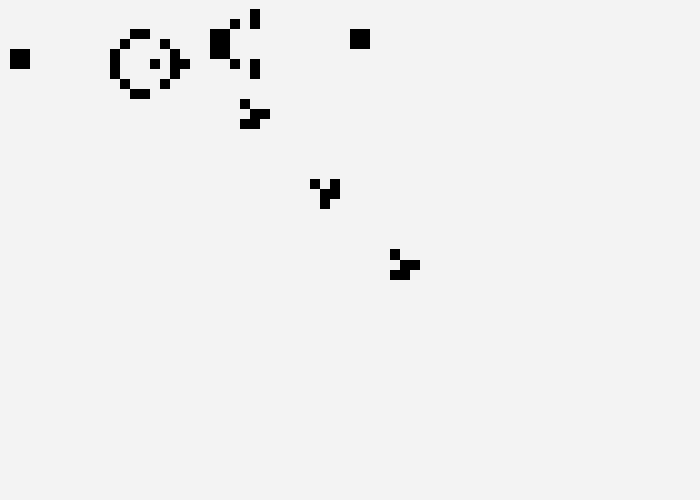
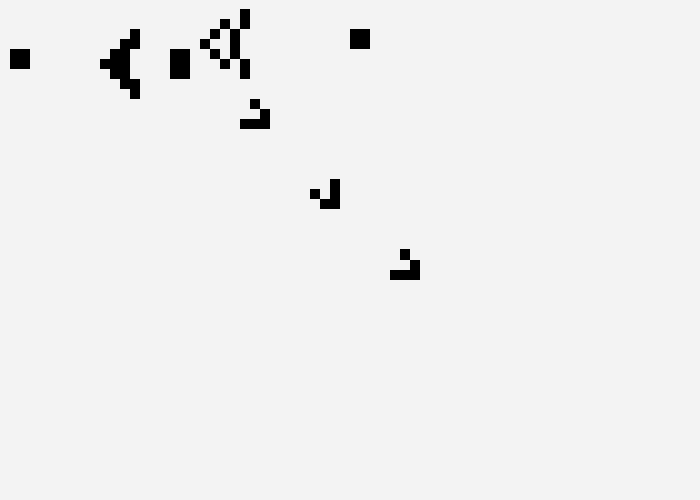
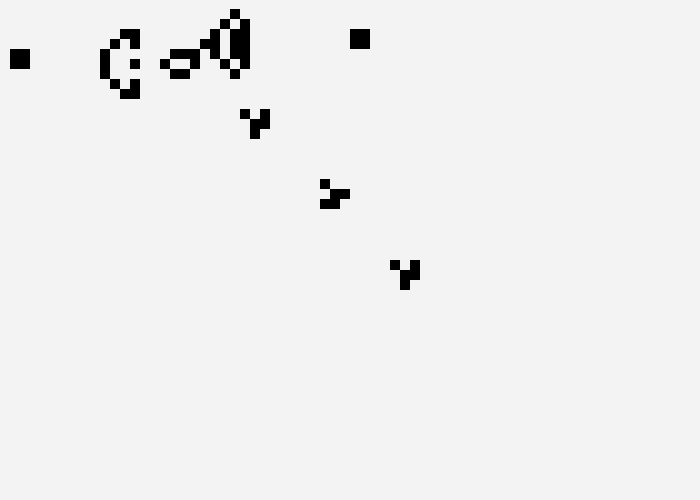
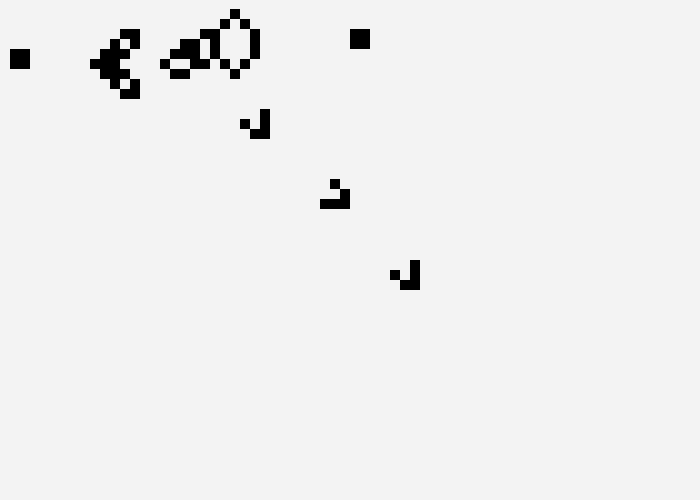
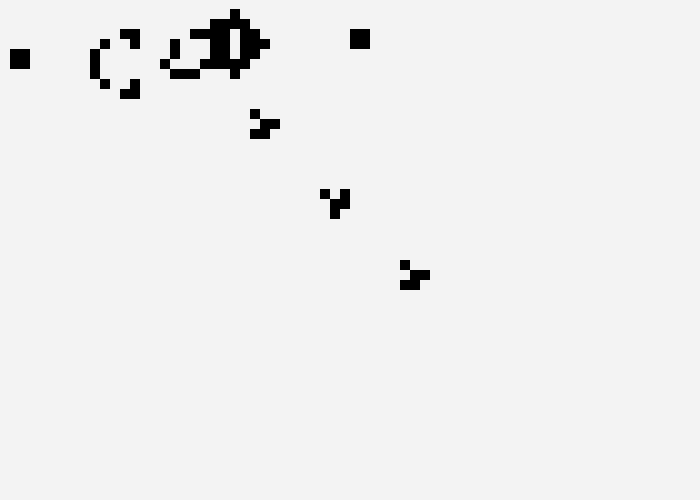
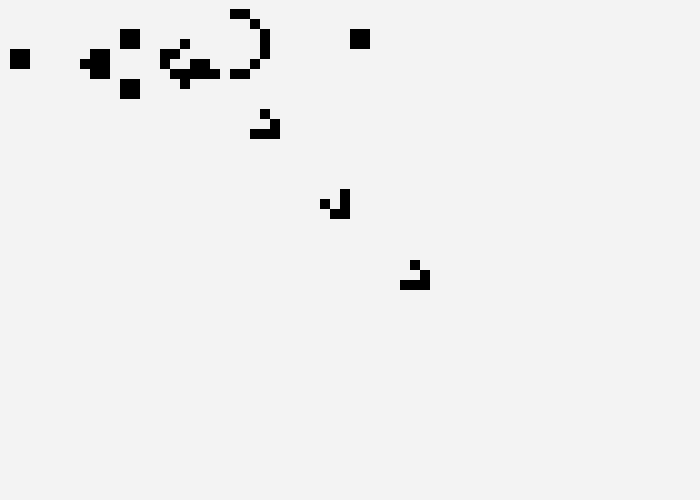
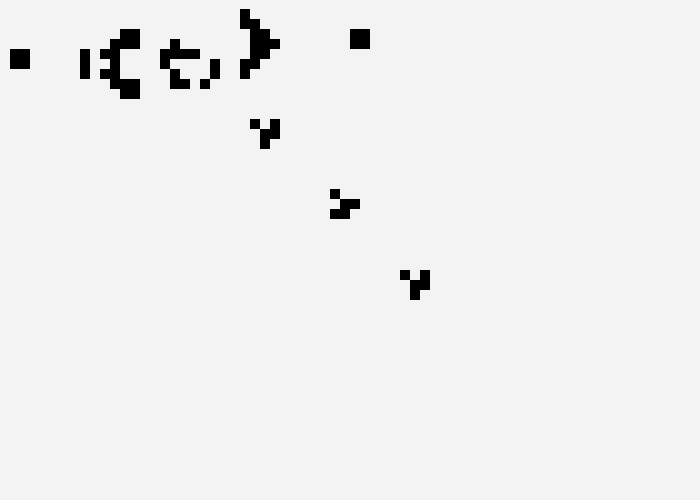
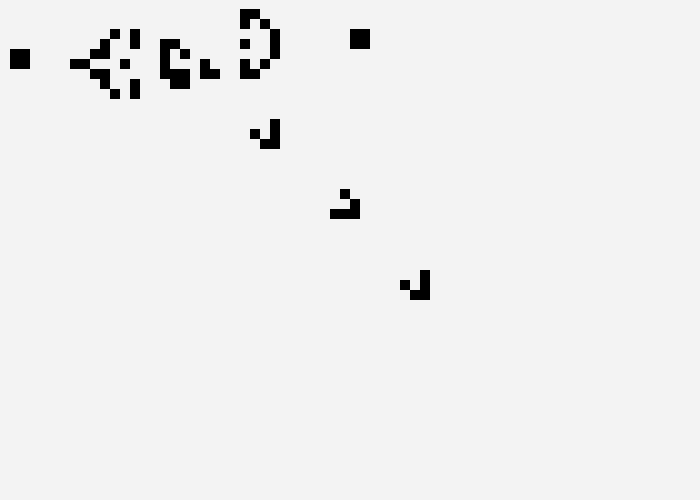
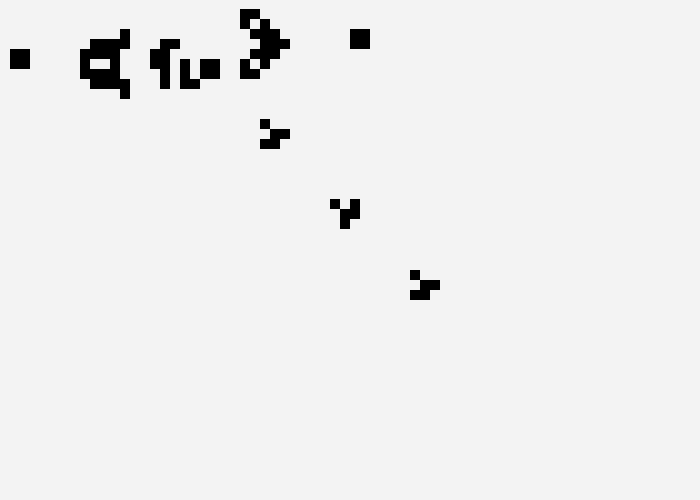
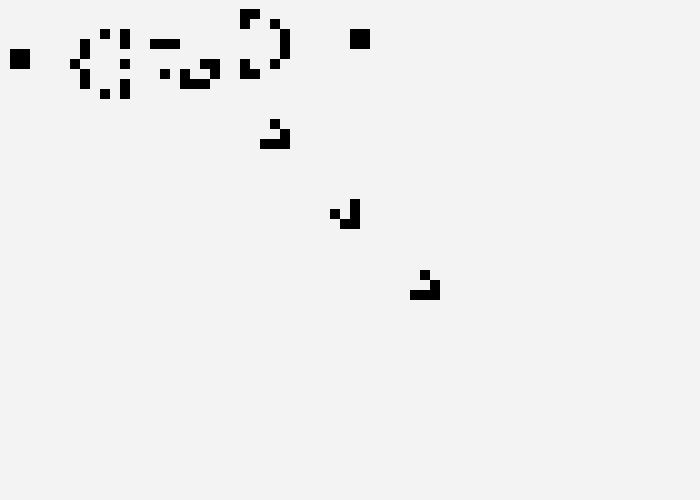
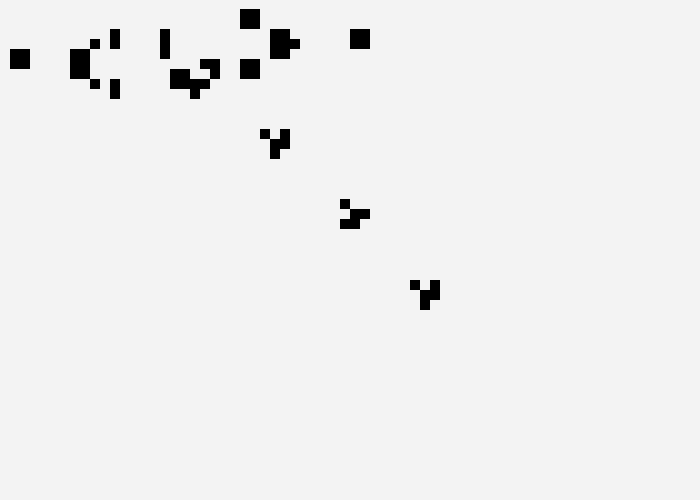
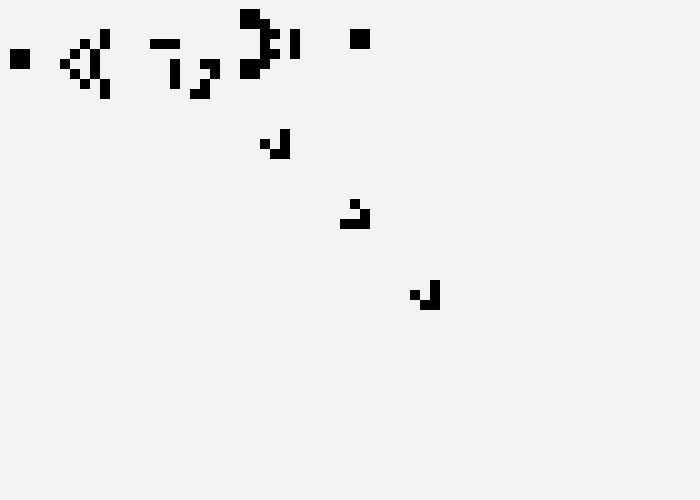
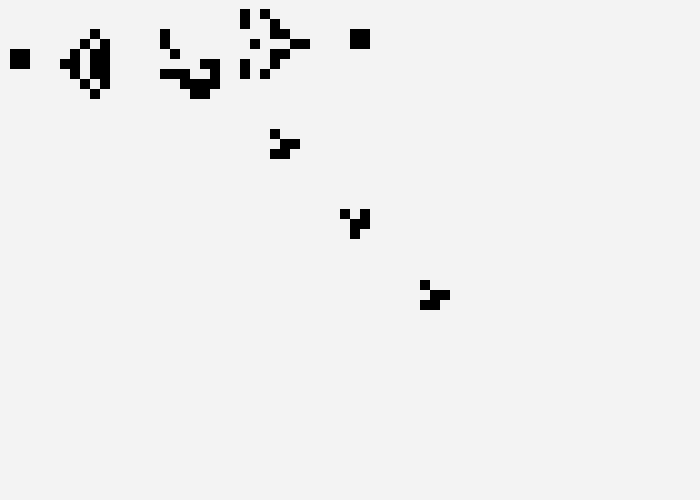
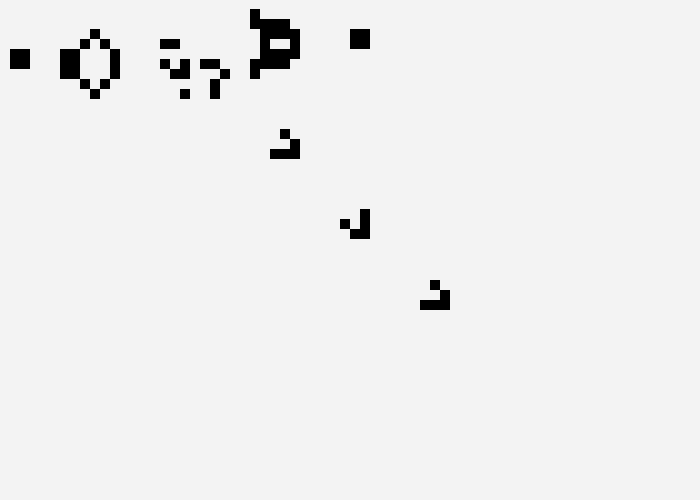
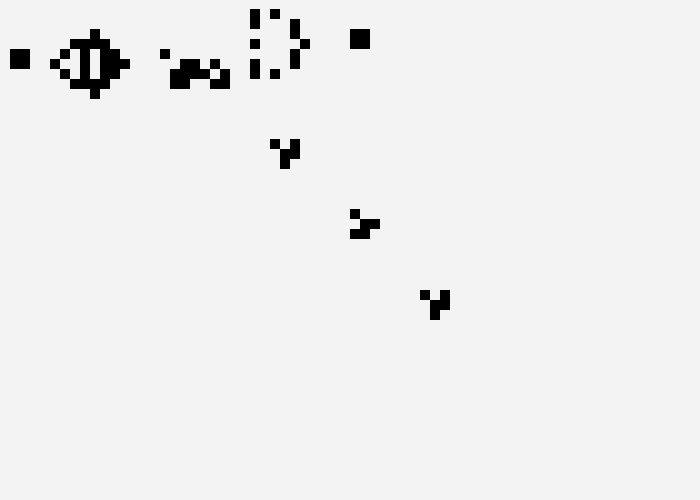
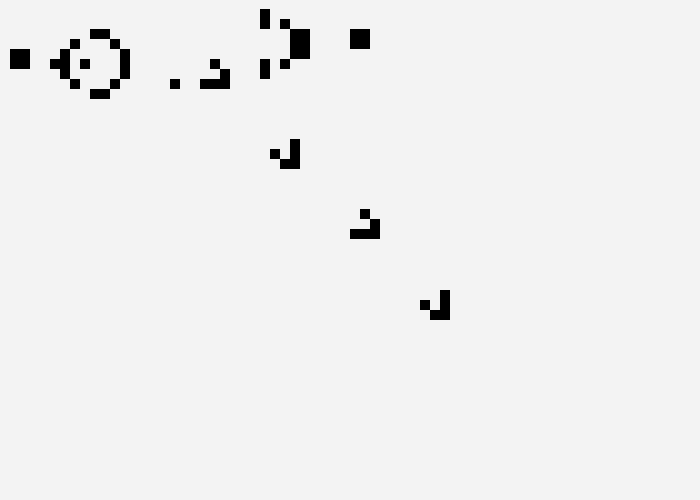
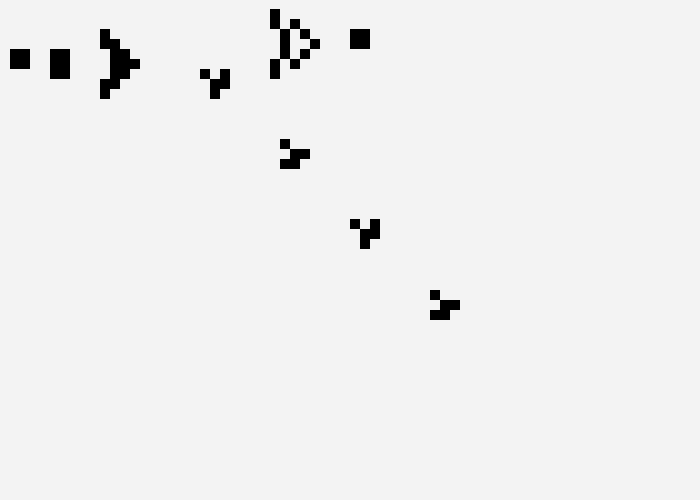
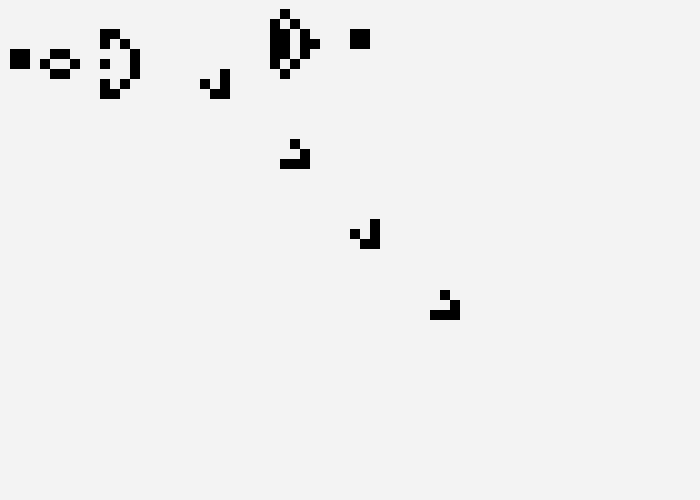
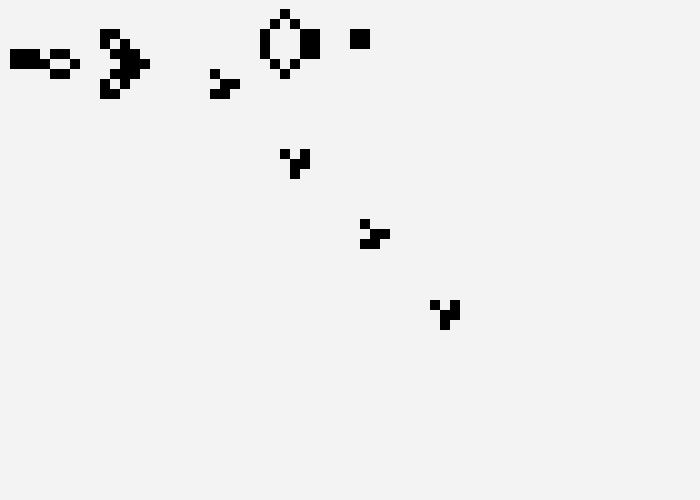
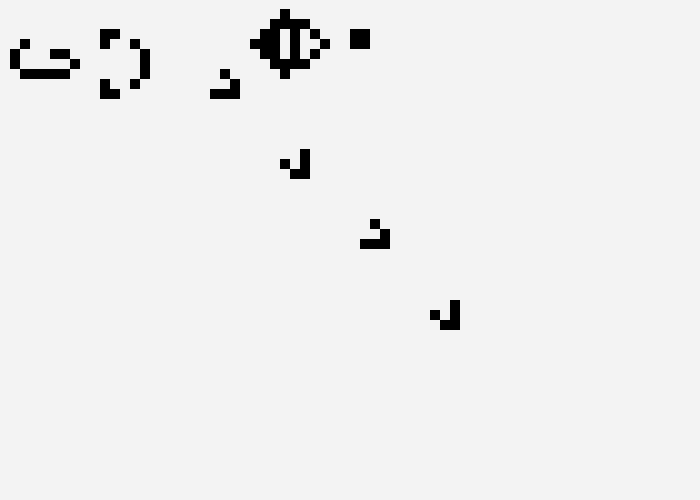
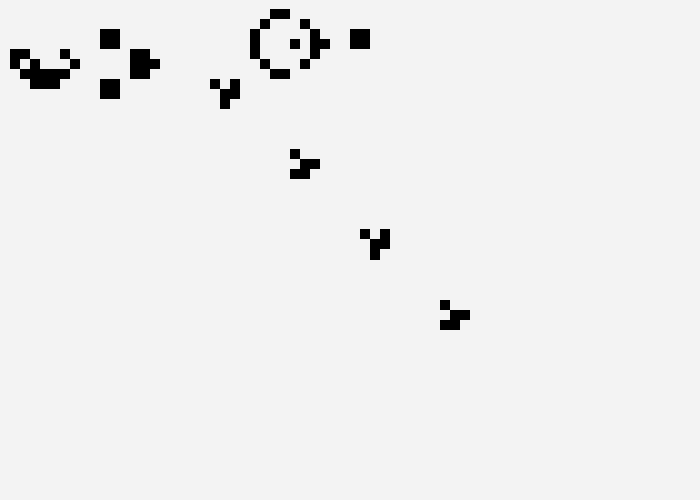
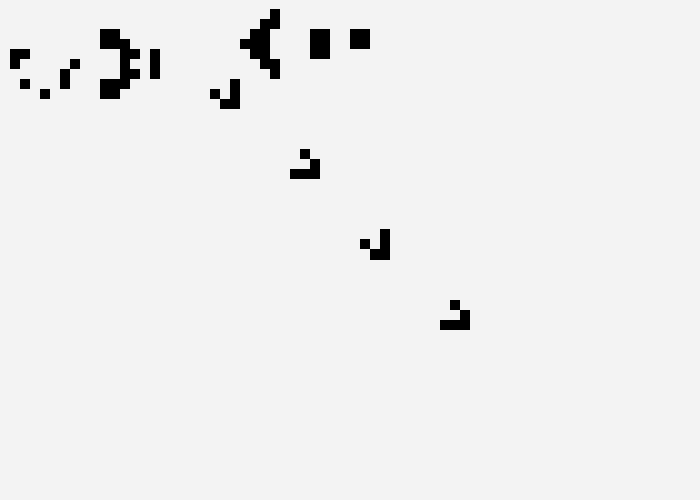
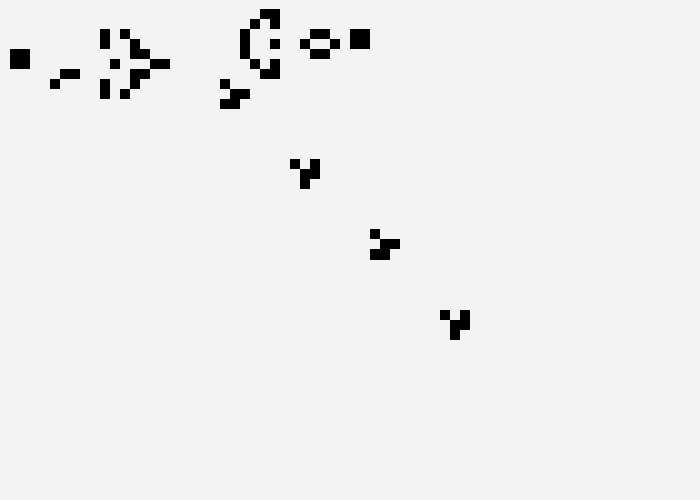
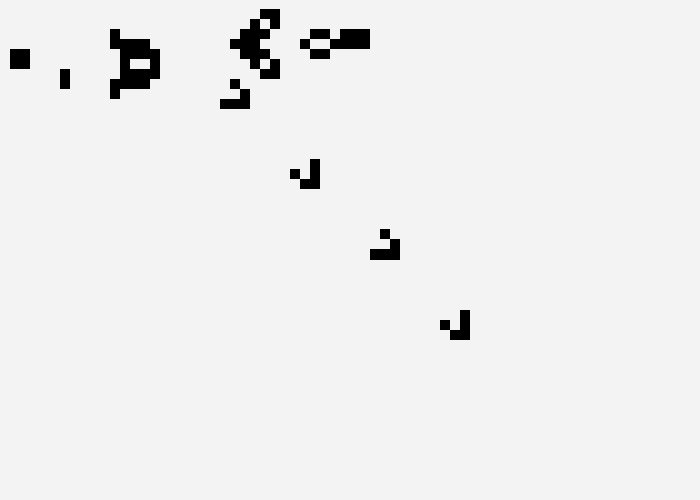
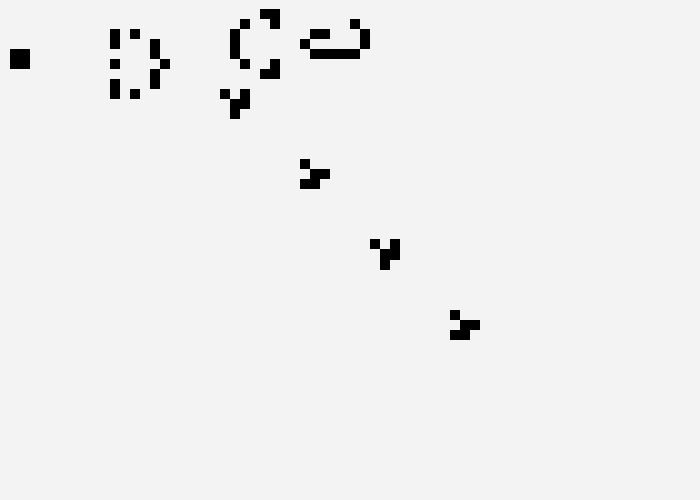
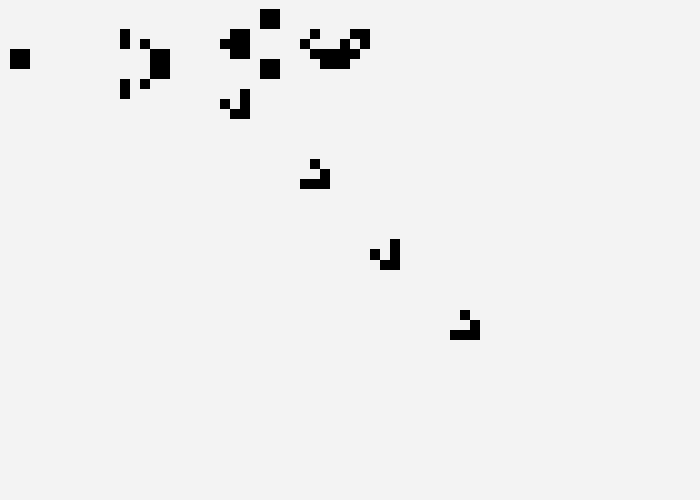
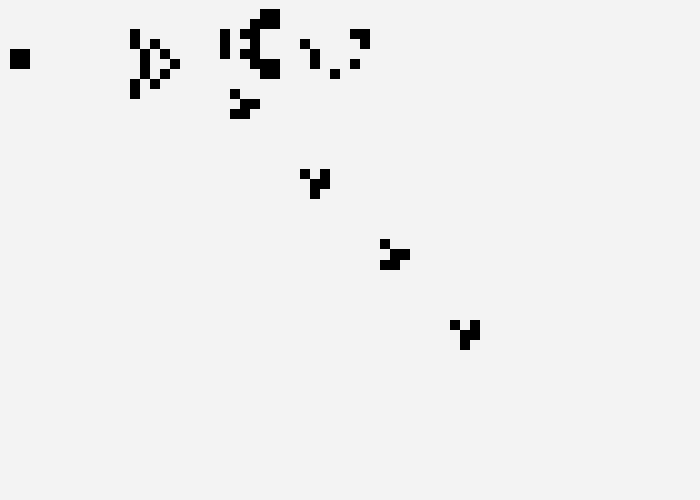
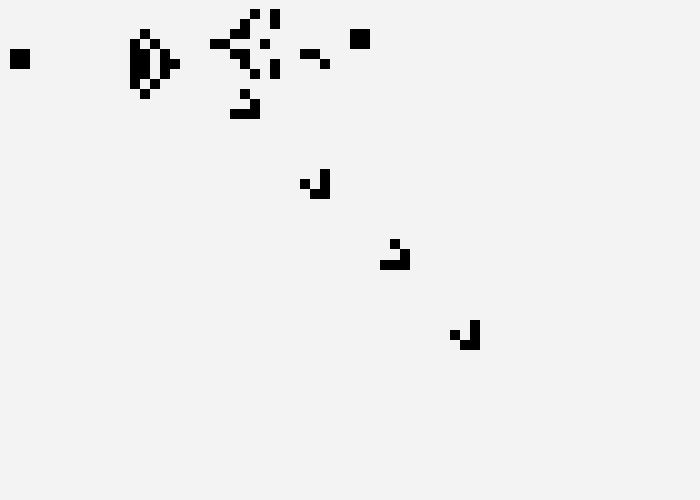
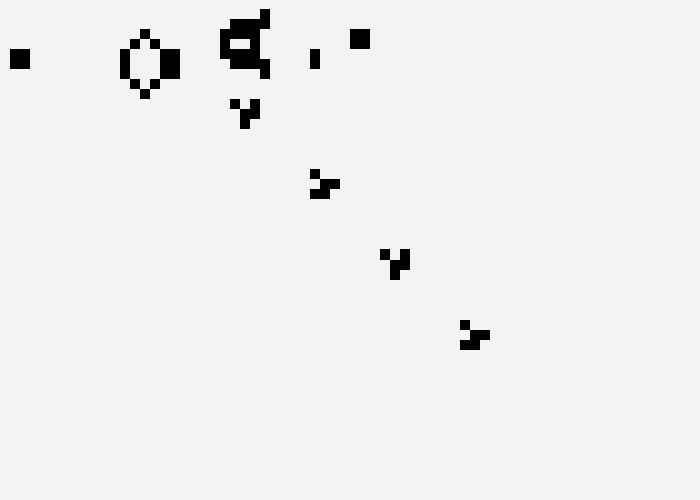
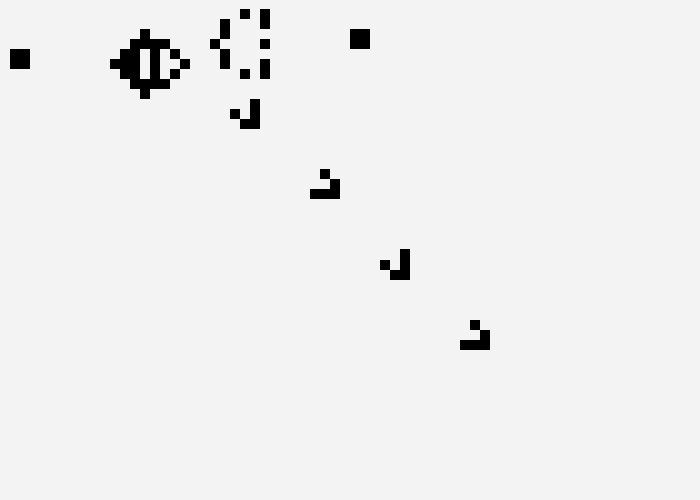
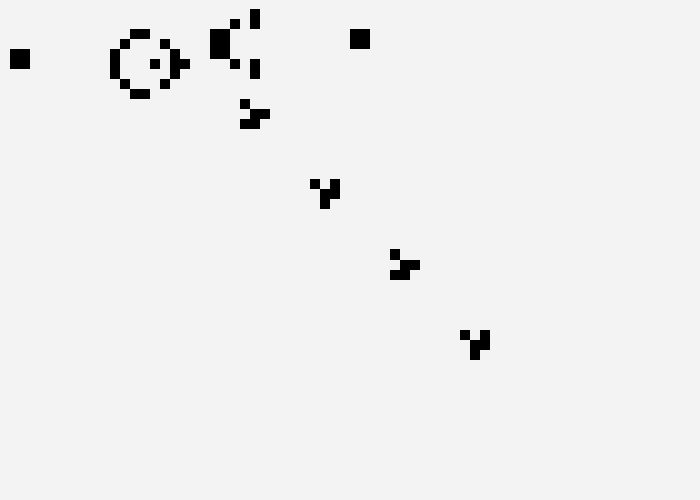
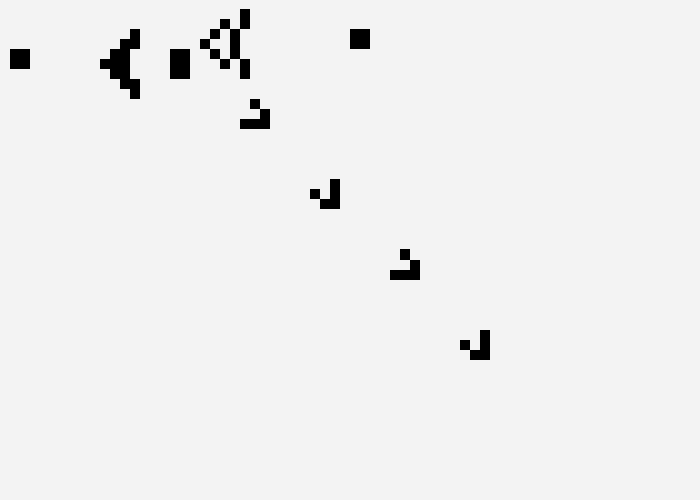
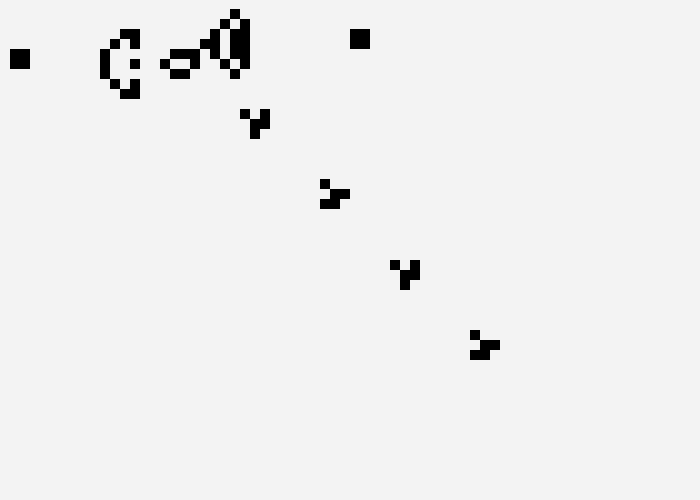
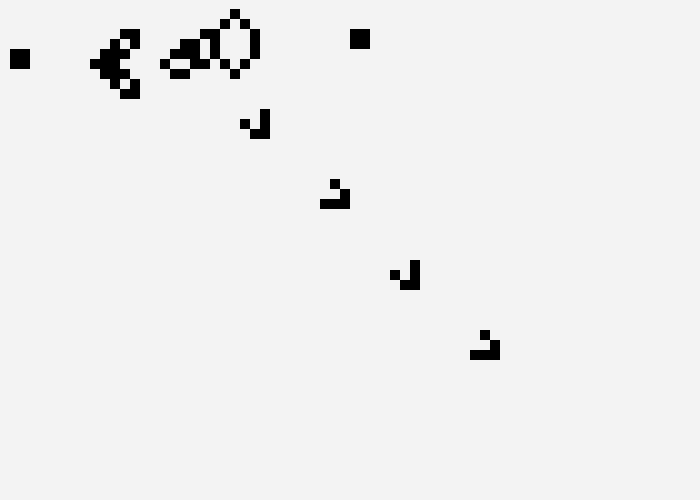
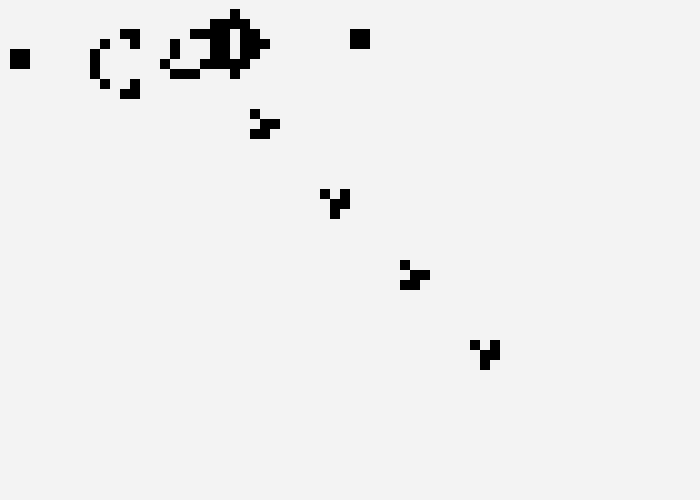
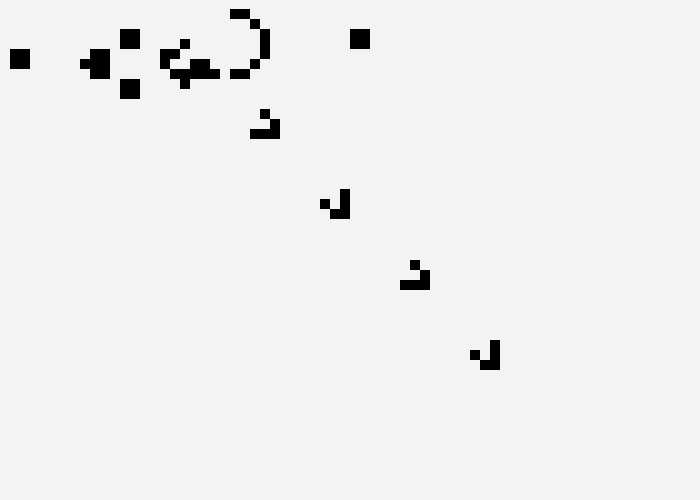
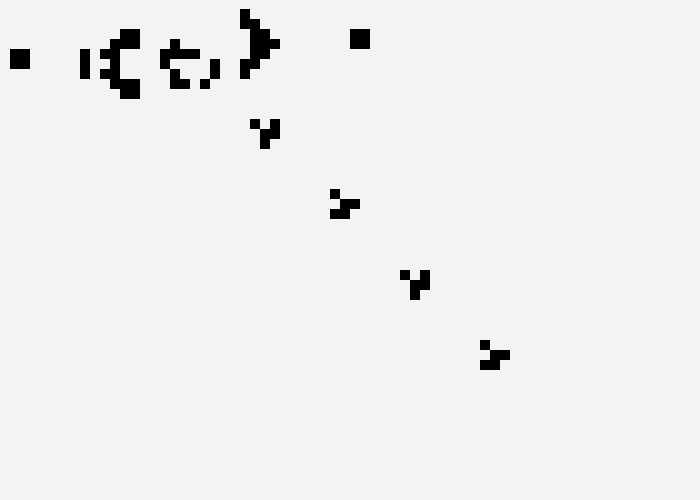
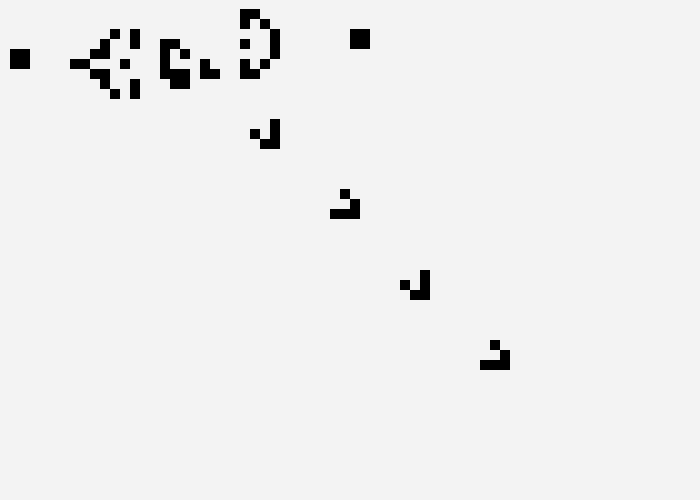
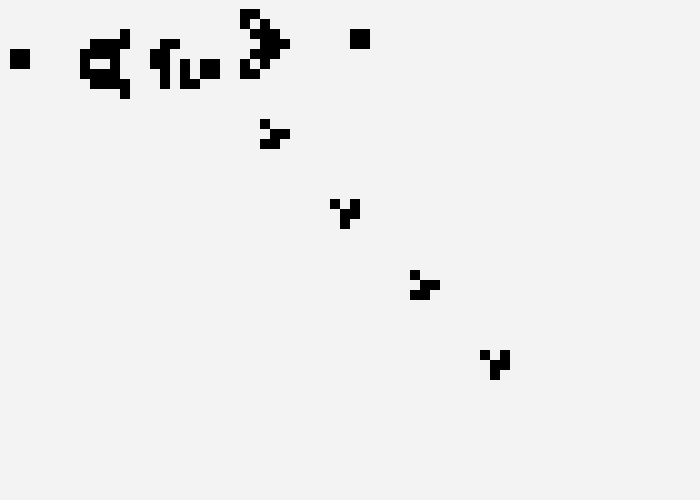
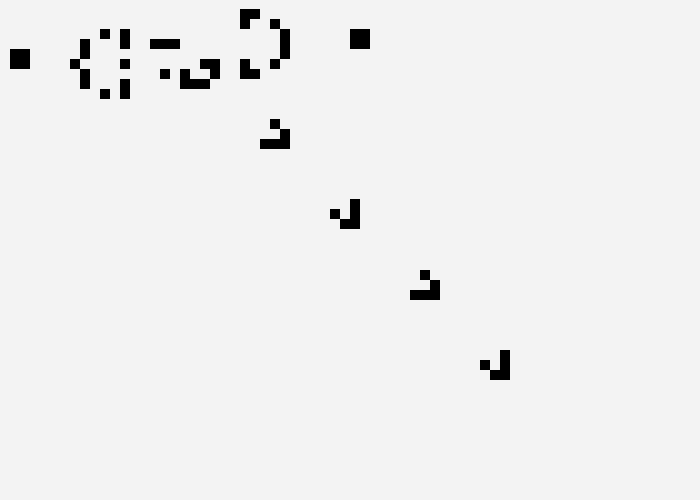
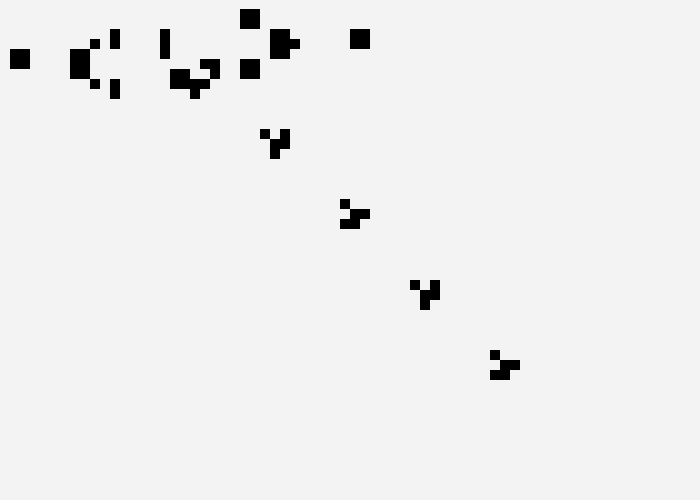
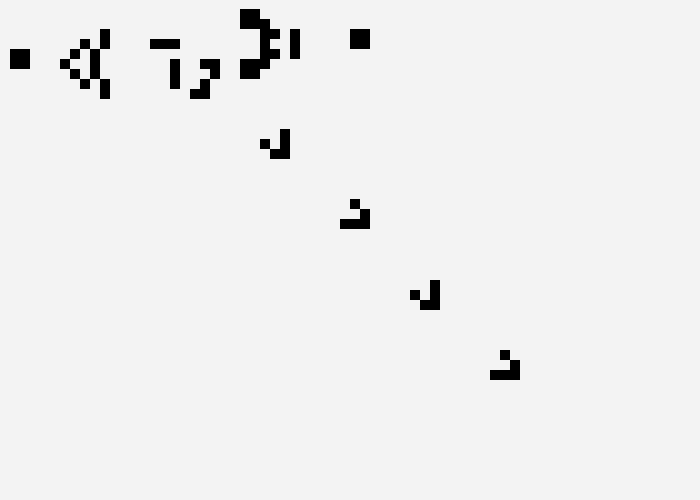
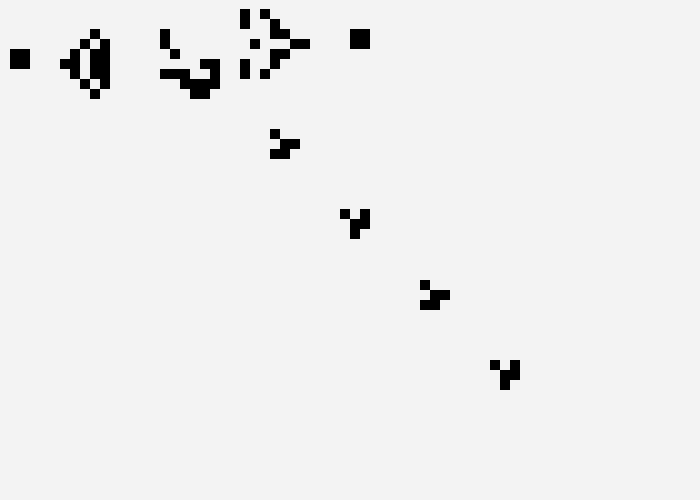
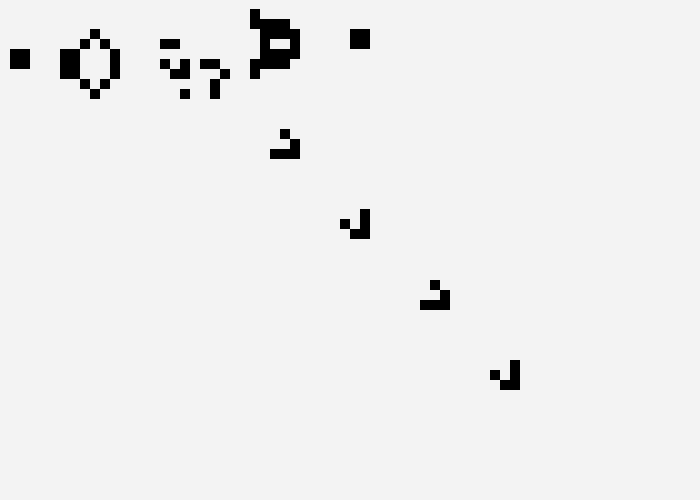
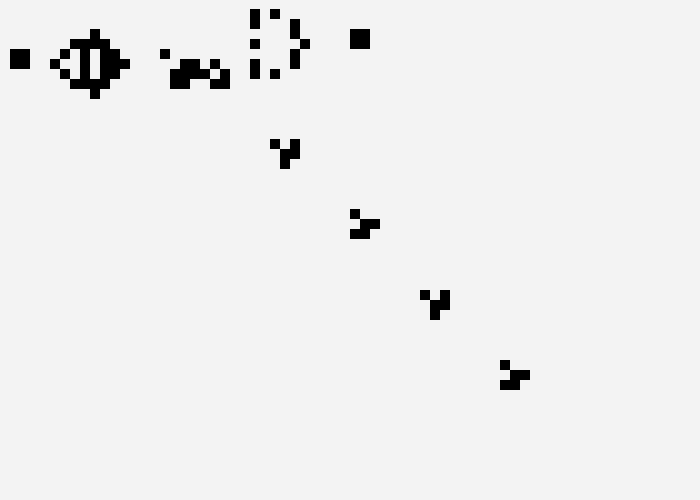
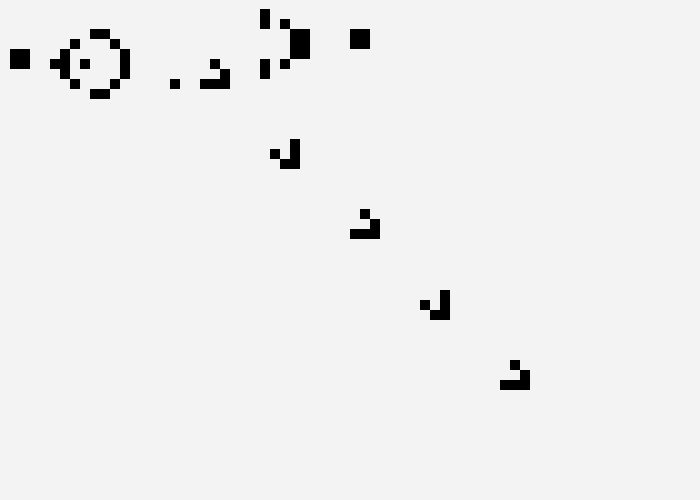
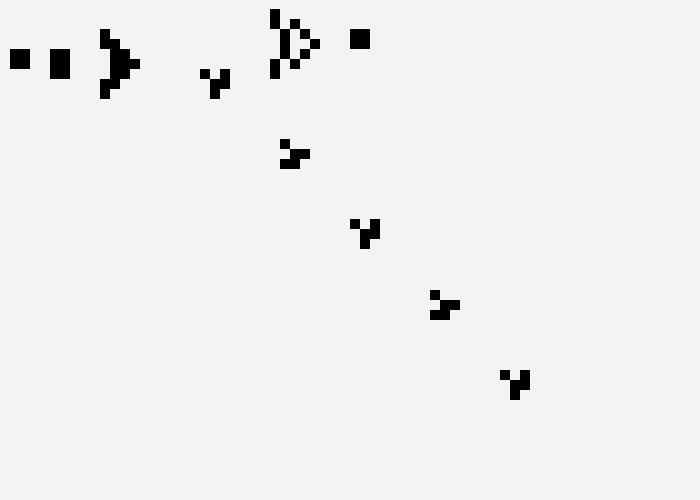
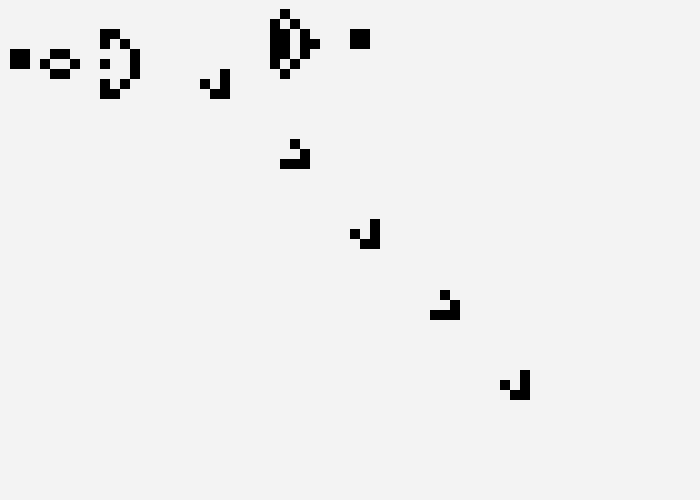
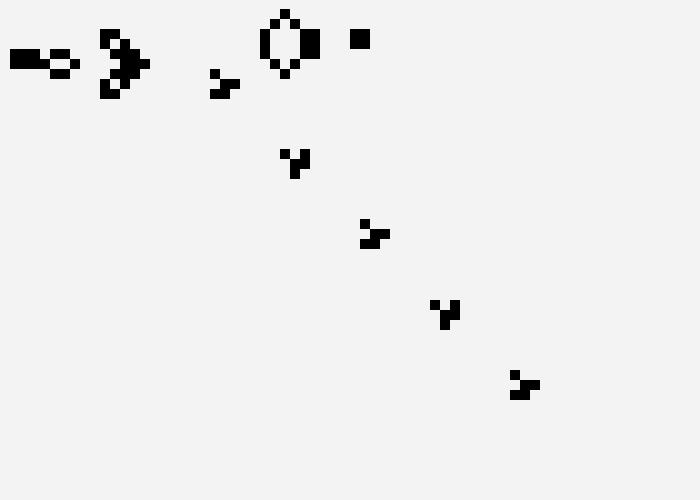
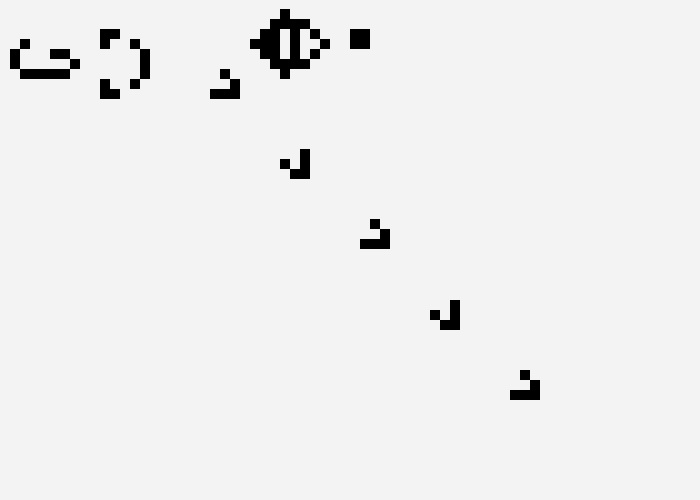
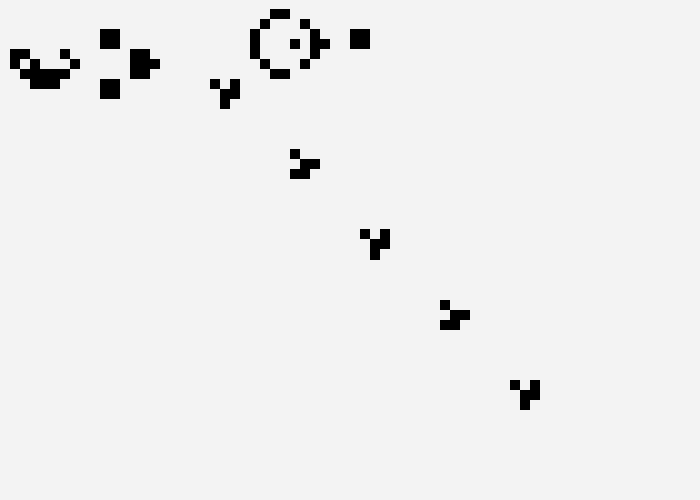
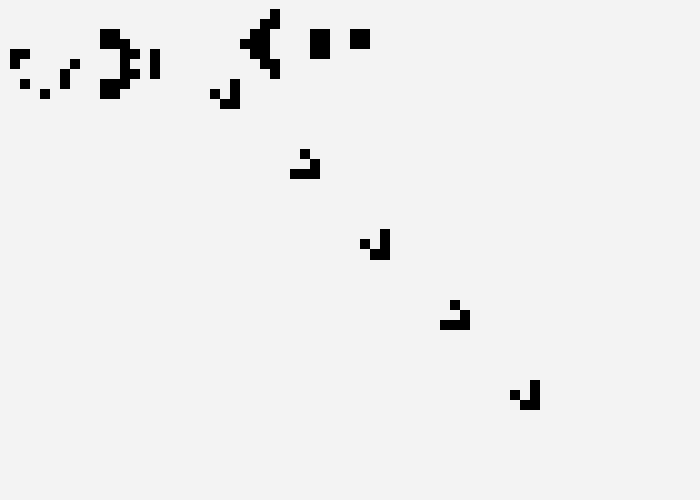
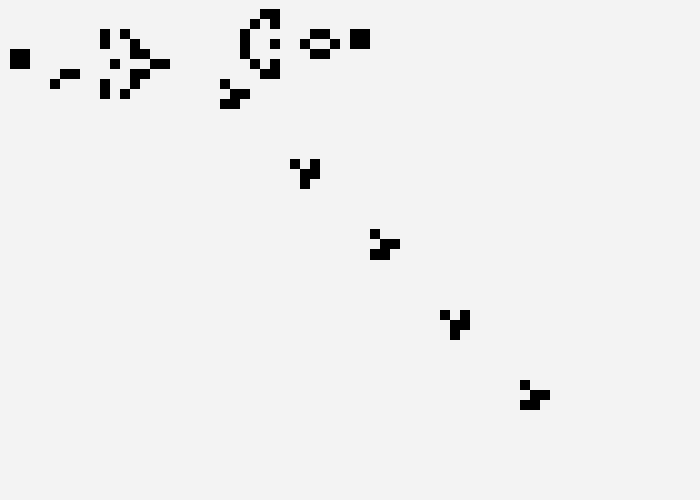
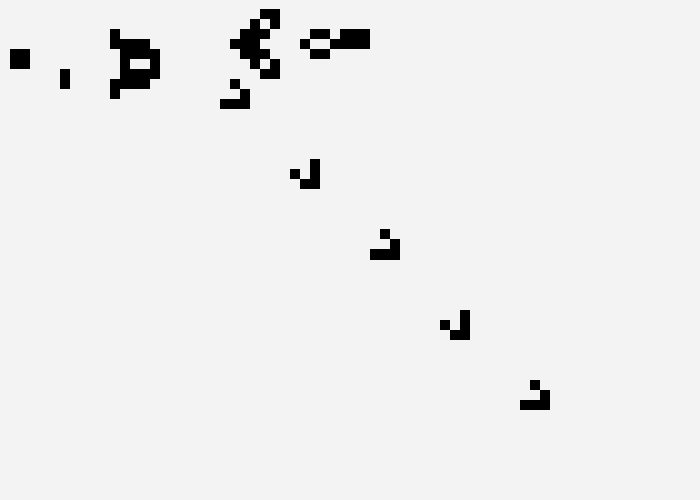
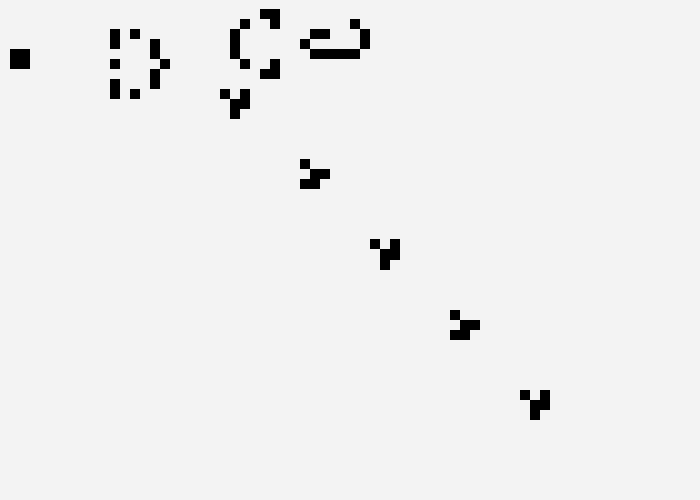
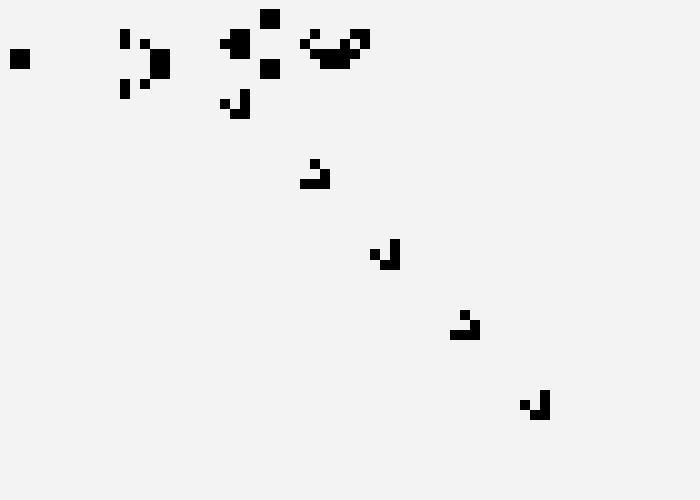
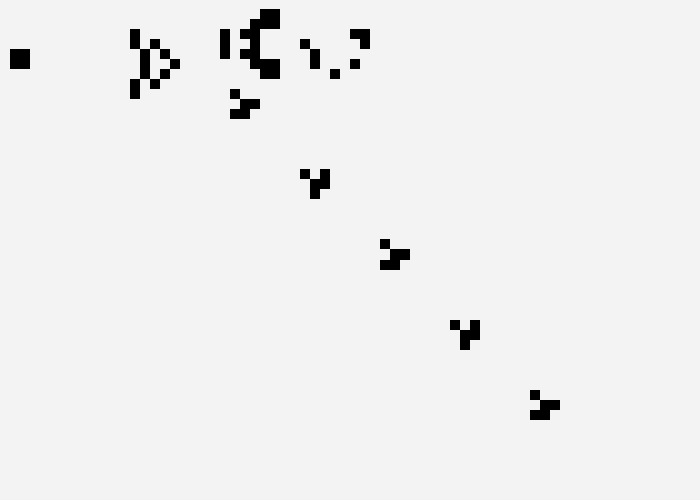
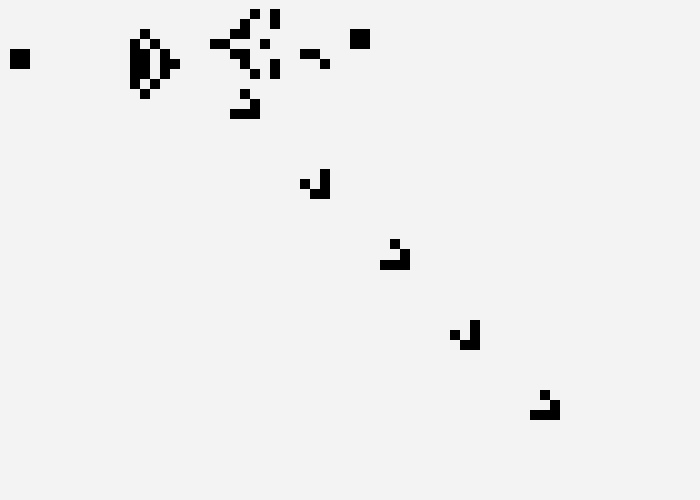
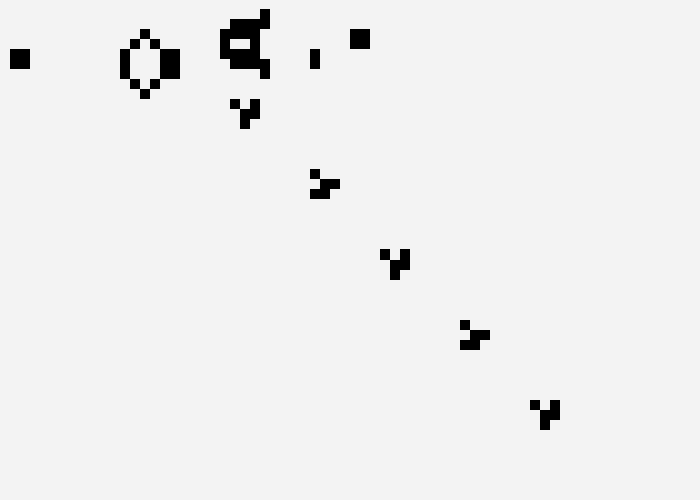
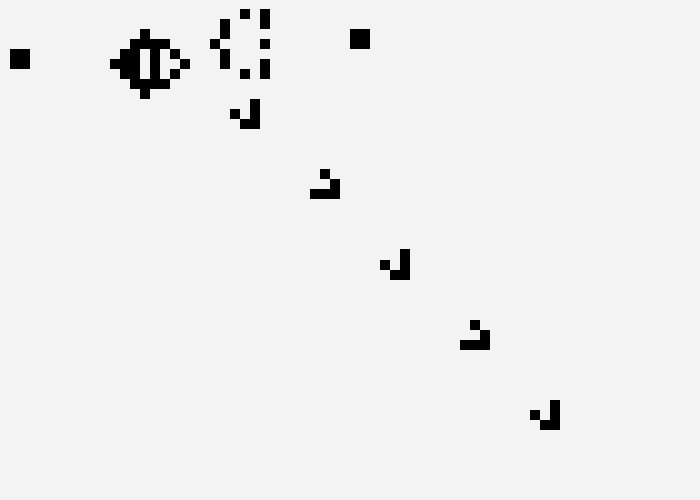
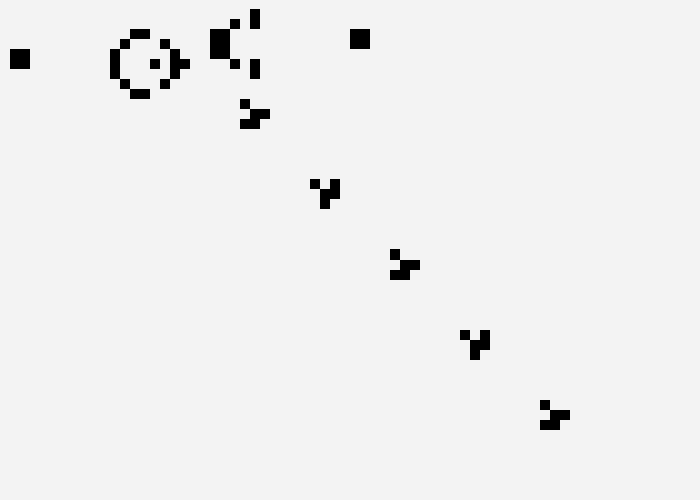
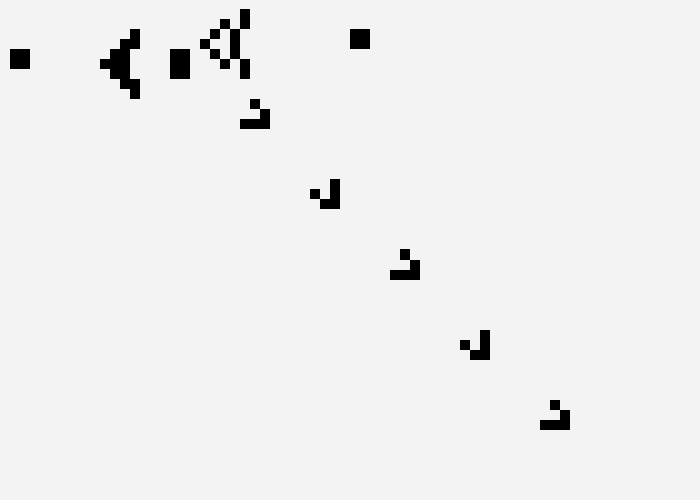
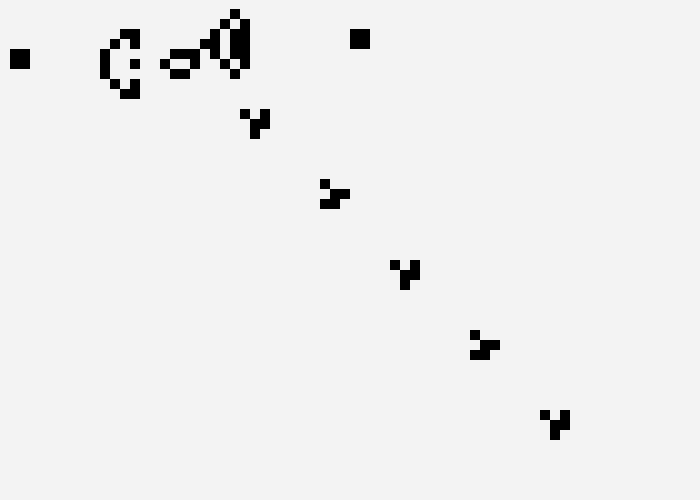
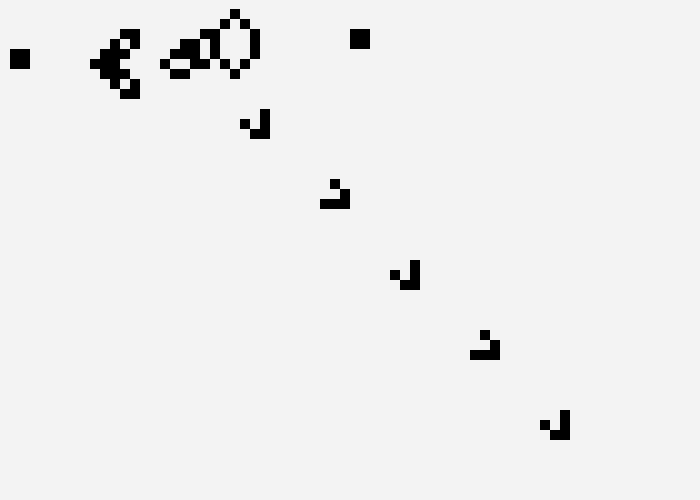
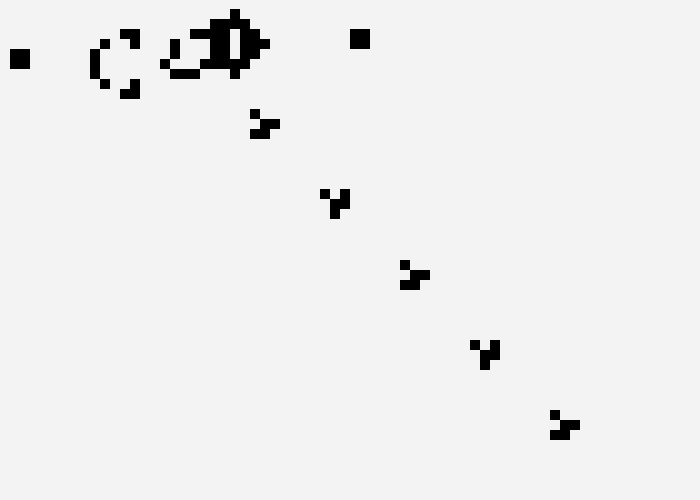
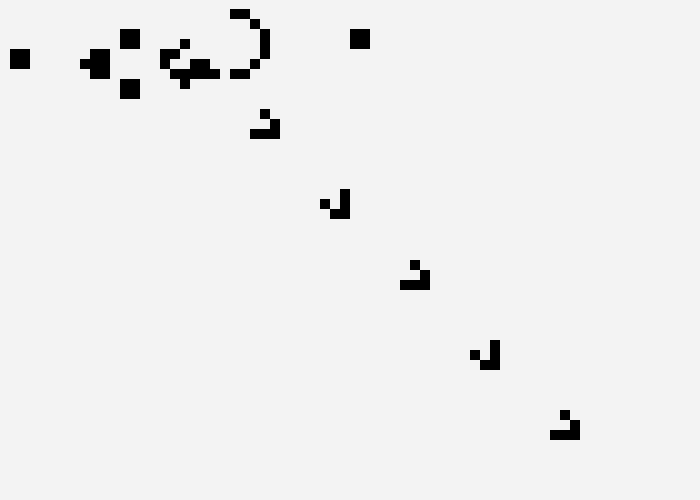
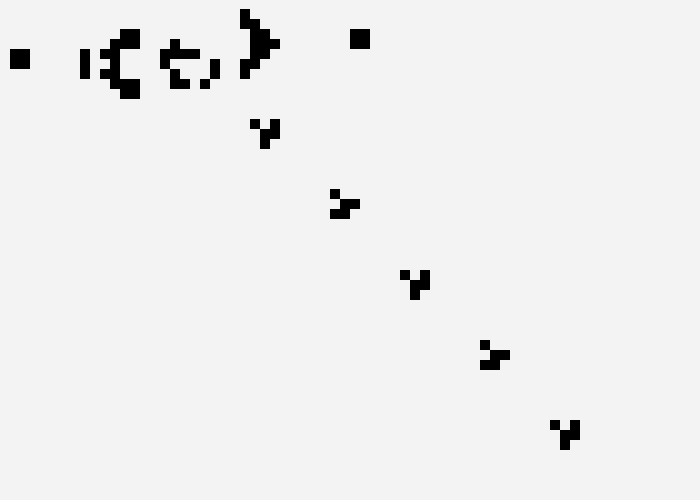
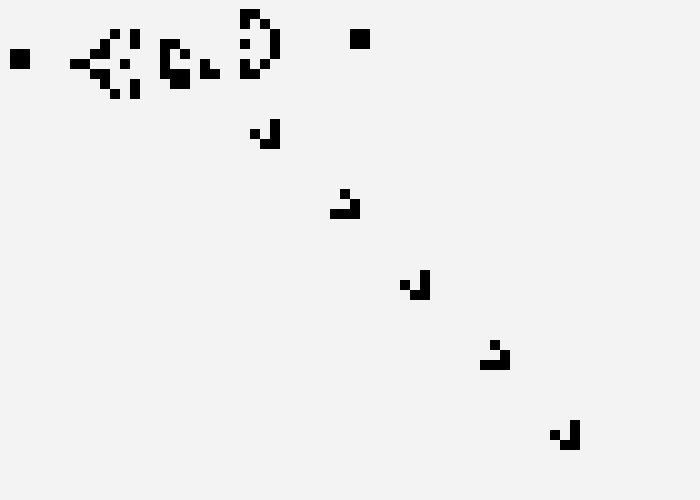
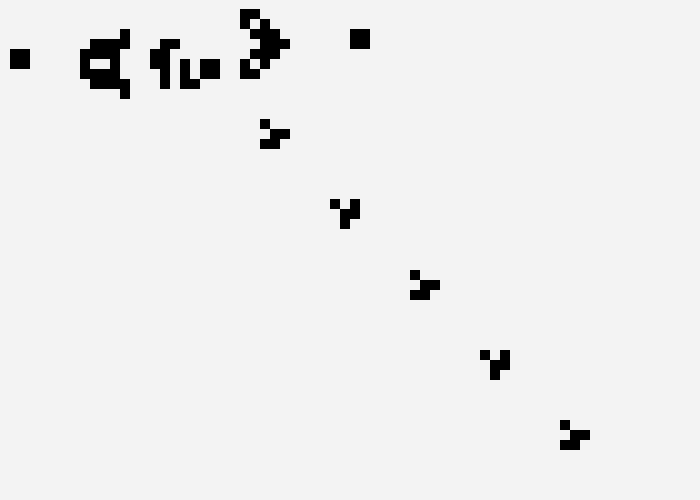
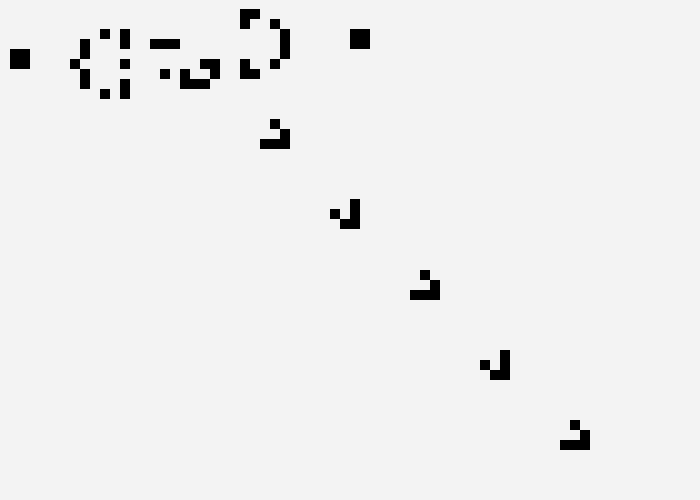
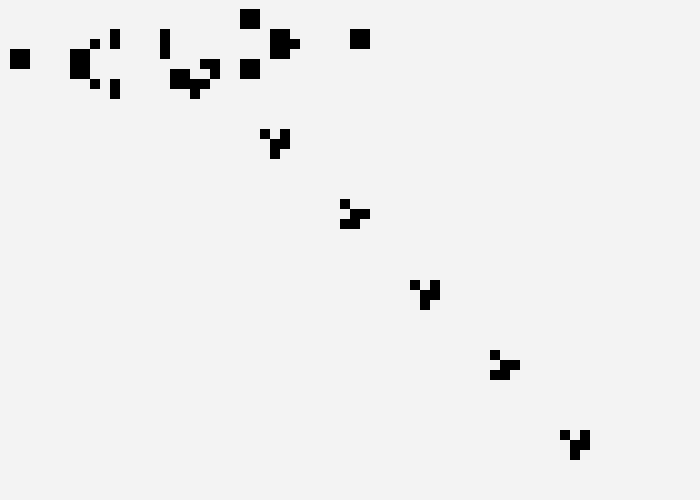
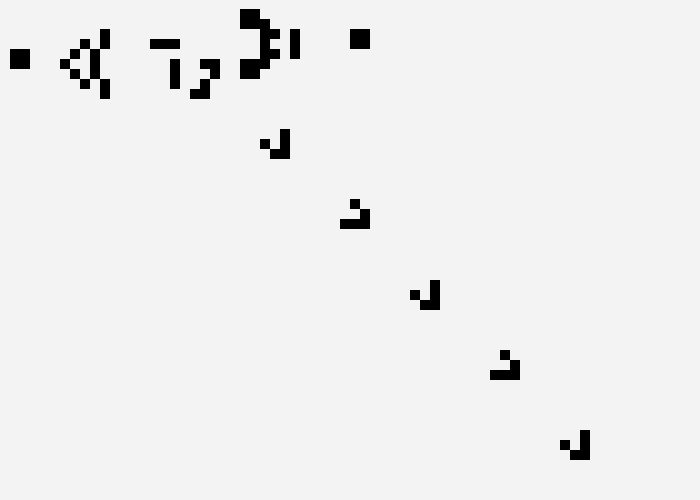
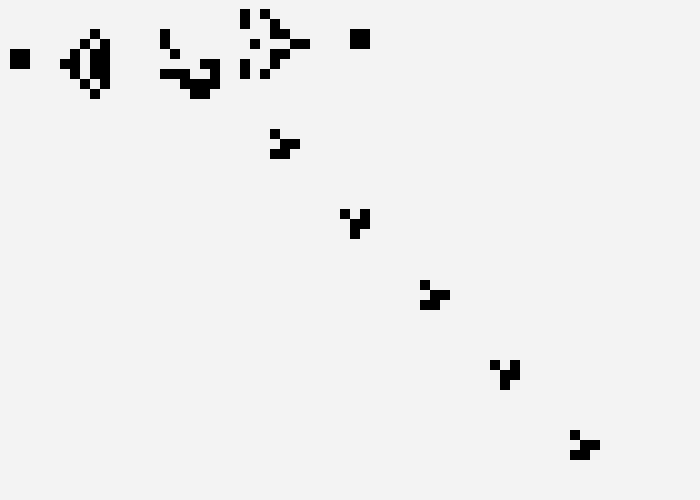
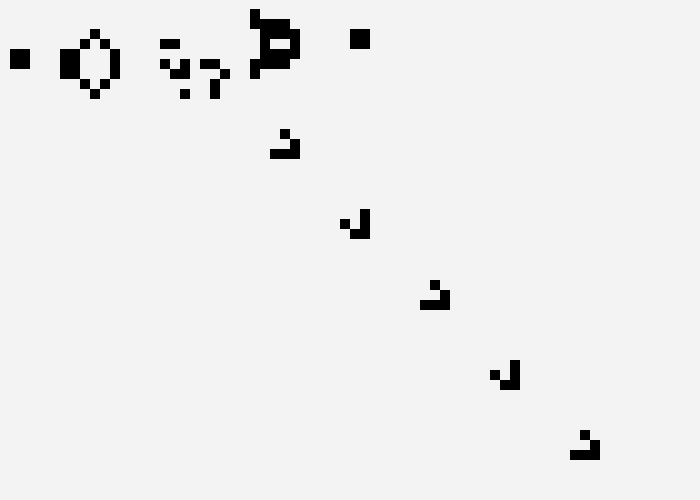
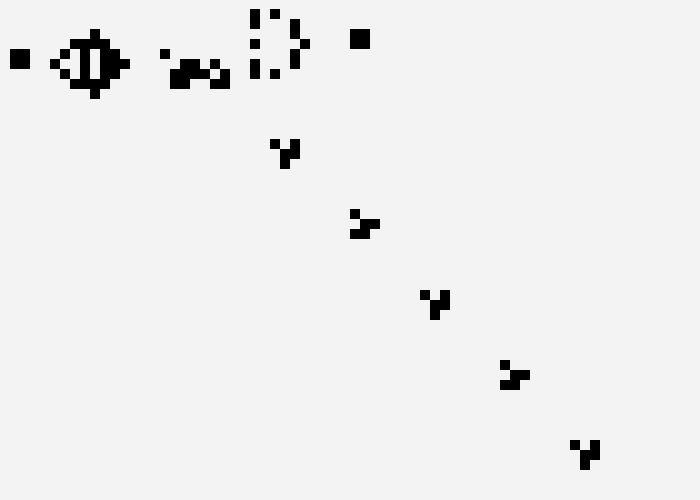
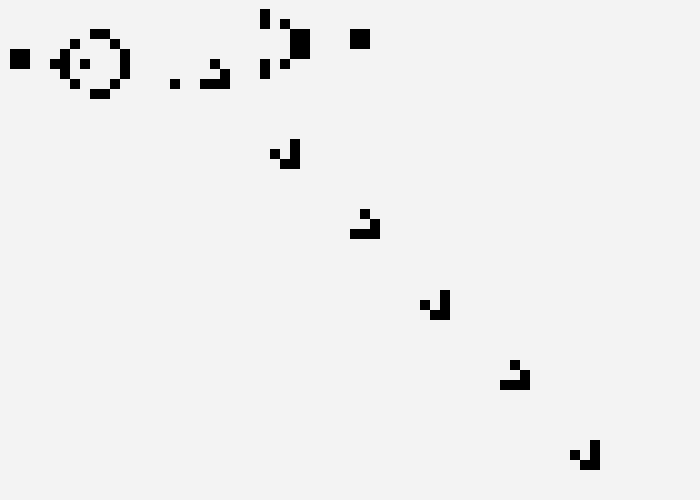
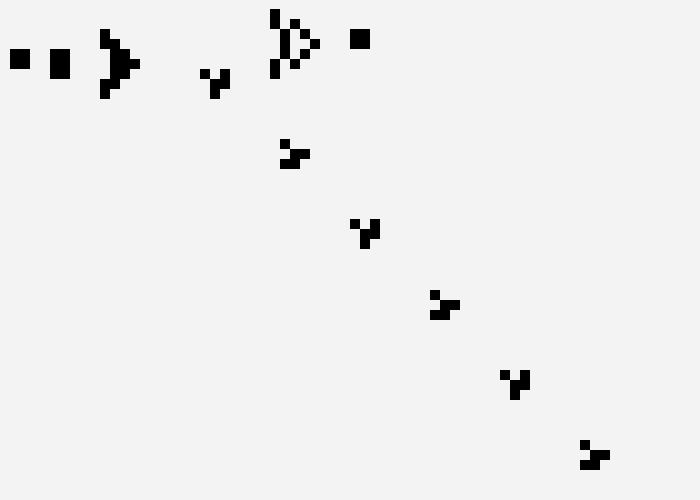
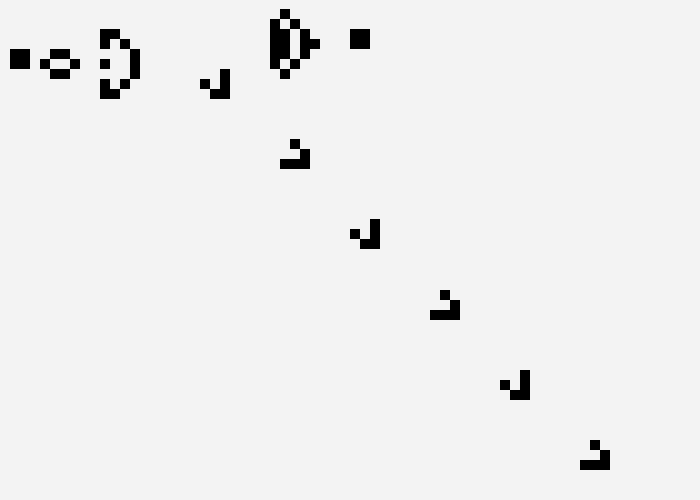
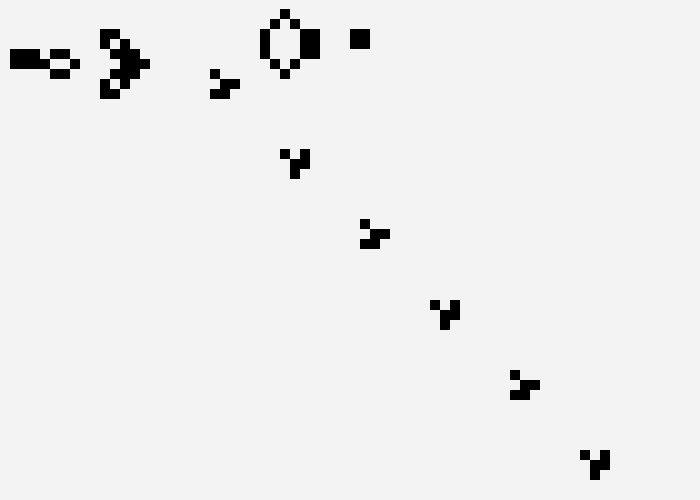
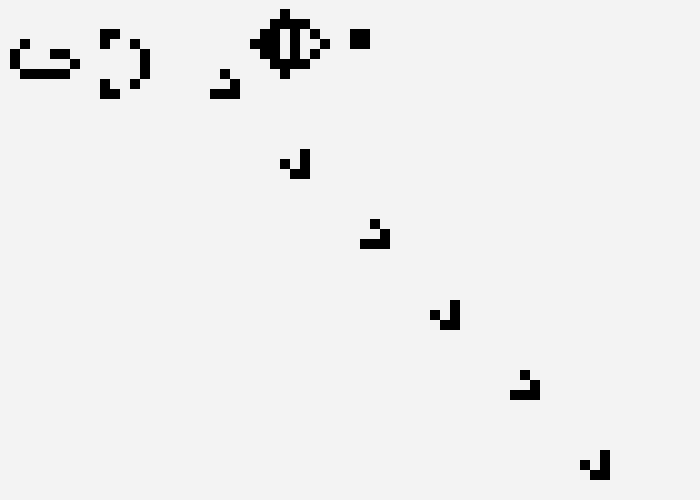
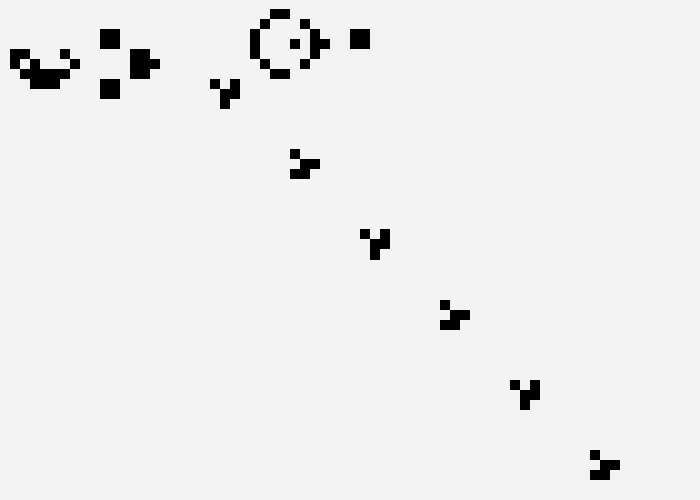
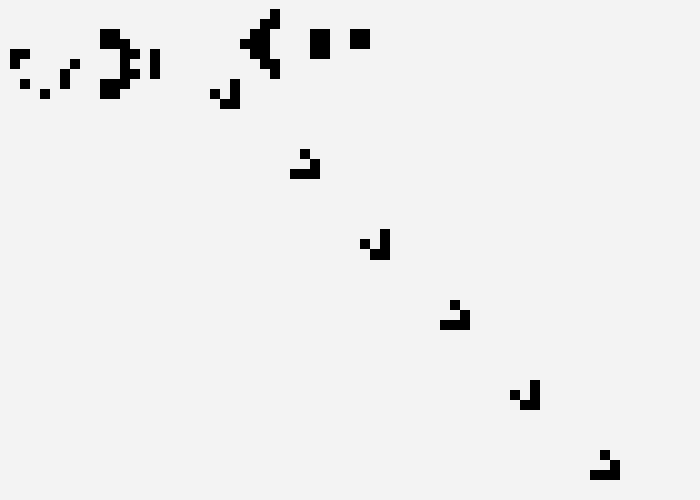
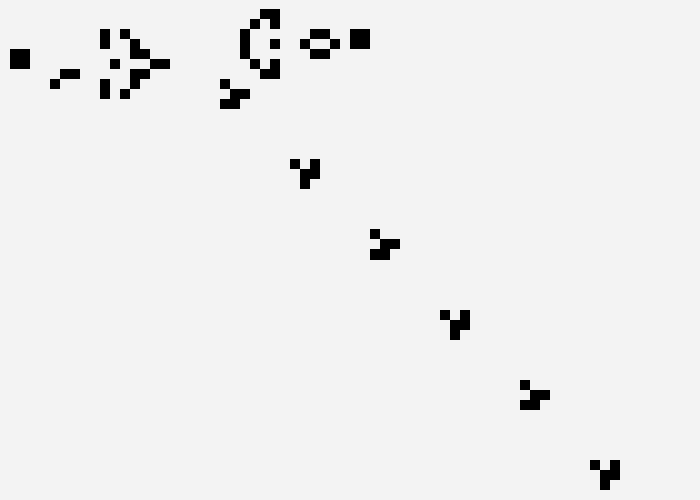
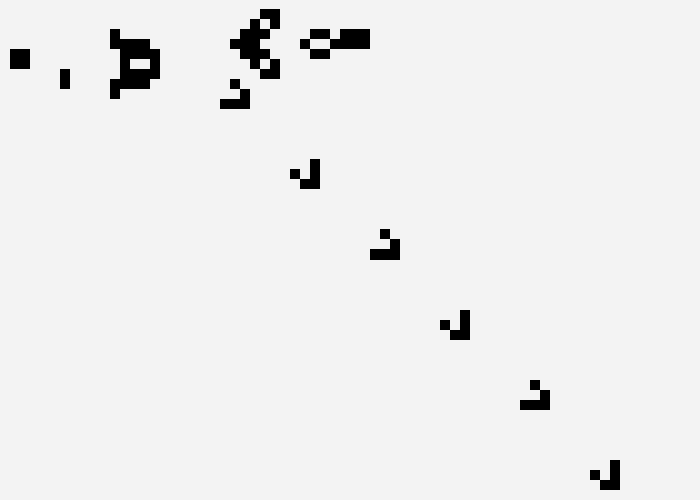
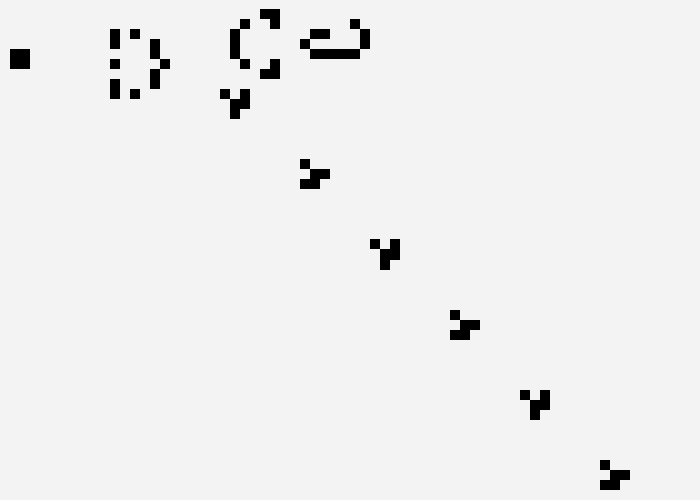
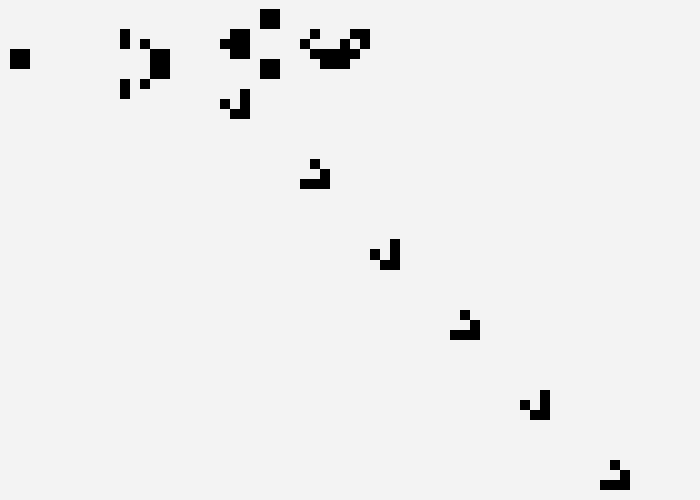
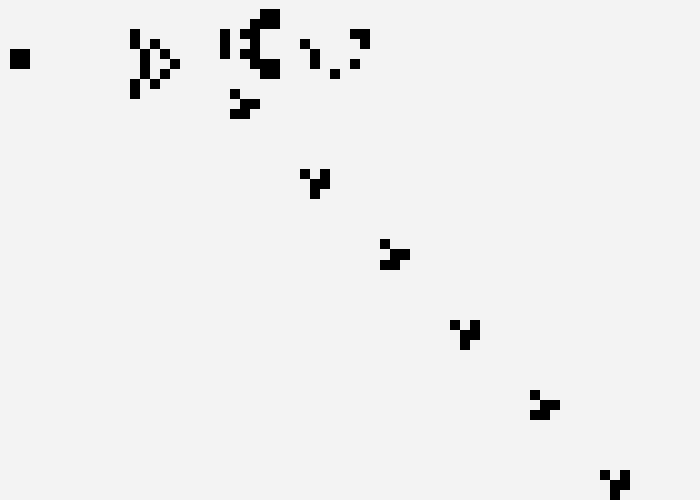
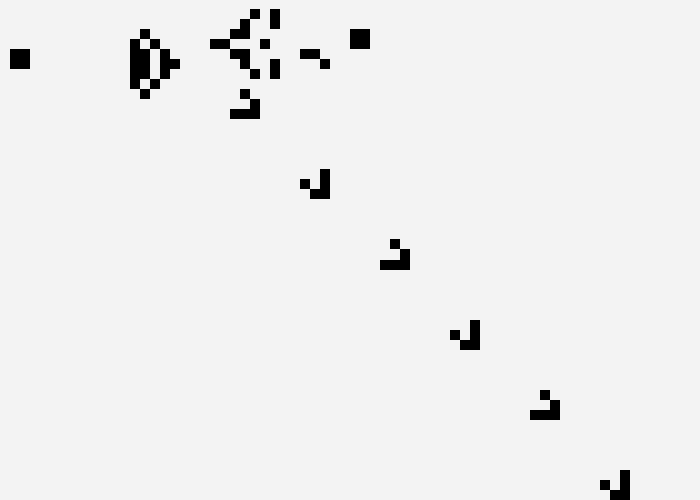
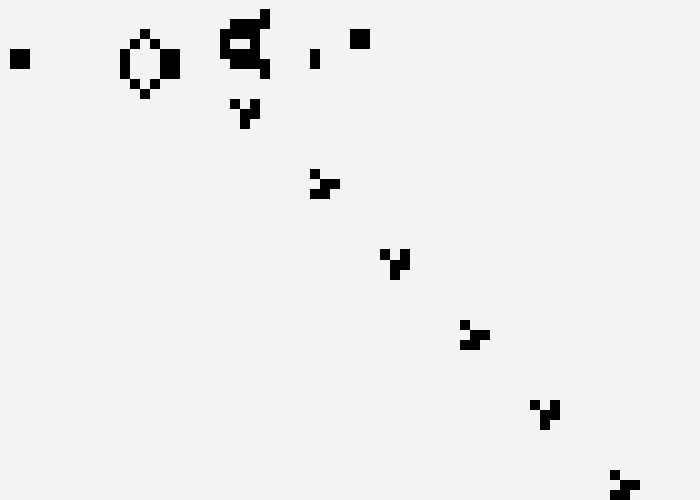
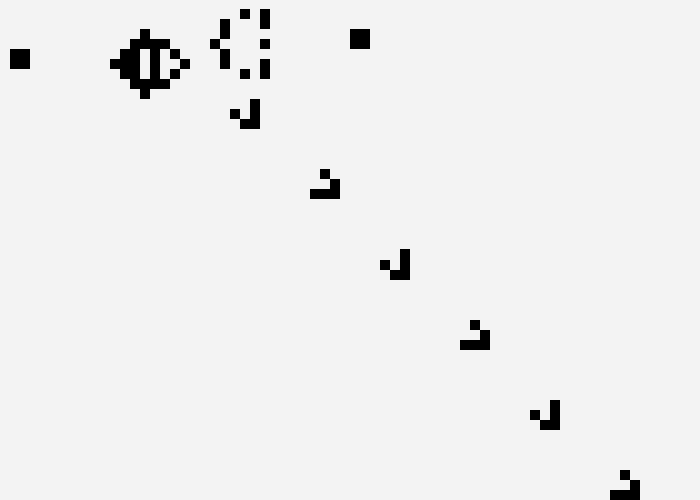

In [16]:
##Bill Gosper's Glider Gun
display_link_audio('World Electric Piano 01.wav')
life_animation(X, dpi=15, frames=180, interval=50, mode='Loop')

A big thank you to:

 - Jake Vanderplas, with his website https://github.com/jakevdp/JSAnimation and his JSAnimation for visual representations 

 - Andrew C. Slotnick, with his website https://github.com/aslotnick/audio_experiments/blob/master/Audio%20Delay%20with%20Python.ipynb
 
 - Most importantly Dr. Aaron Titus for all his help